In [1]:
"""
Import semua libraries yang dibutuhkan untuk EDA dan preprocessing.
"""

# Data manipulation
import pandas as pd
import numpy as np
from collections import Counter

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical testing
from scipy import stats
from scipy.stats import chi2_contingency, ttest_ind, kstest, shapiro

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Matplotlib style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Plot settings for publication quality
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 11
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("="*80)
print("All libraries imported successfully!")
print("="*80)

All libraries imported successfully!


In [2]:
# CELL 2: LOAD DATASET
# ============================================================================
"""
Load dataset Drug Consumption dari UCI ML Repository.
Dataset berisi 1,885 responden dengan 12 features + 18 drug targets.
"""

# Load data
file_path = '../data/raw/drug_consumption_raw.csv'
df = pd.read_csv(file_path)

print("="*80)
print("DATASET LOADED: Drug Consumption (Quantified)")
print("="*80)
print(f" File path: {file_path}")
print(f" Shape: {df.shape}")
print(f" Rows: {df.shape[0]:,} responden")
print(f" Columns: {df.shape[1]} features")
print(f" Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print("="*80)


DATASET LOADED: Drug Consumption (Quantified)
 File path: ../data/raw/drug_consumption_raw.csv
 Shape: (1885, 32)
 Rows: 1,885 responden
 Columns: 32 features
 Memory: 2.24 MB


In [3]:
"""
Inspeksi awal dataset: info, dtypes, missing values, duplicates.
"""

print("\n" + "="*80)
print("BASIC DATA INSPECTION")
print("="*80)

# Dataset info
print("\n1️DATASET INFO:")
print("-"*80)
df.info()

# Data types
print("\n2️DATA TYPES SUMMARY:")
print("-"*80)
print(df.dtypes.value_counts())

# Missing values
print("\n3️MISSING VALUES:")
print("-"*80)
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percentage': missing_pct
})
print(missing_df[missing_df['Missing_Count'] > 0])
if missing.sum() == 0:
    print("NO MISSING VALUES! Dataset is clean.")

# Duplicates
print("\nDUPLICATE ROWS:")
print("-"*80)
duplicates = df.duplicated().sum()
print(f"Total duplicates: {duplicates}")
if duplicates == 0:
    print(" NO DUPLICATES!")

# First few rows
print("\n5️ SAMPLE DATA (First 5 rows):")
print("-"*80)
display(df.head())


BASIC DATA INSPECTION

1️DATASET INFO:
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1885 non-null   int64  
 1   age        1885 non-null   float64
 2   gender     1885 non-null   float64
 3   education  1885 non-null   float64
 4   country    1885 non-null   float64
 5   ethnicity  1885 non-null   float64
 6   Nscore     1885 non-null   float64
 7   Escore     1885 non-null   float64
 8   Oscore     1885 non-null   float64
 9   Ascore     1885 non-null   float64
 10  Cscore     1885 non-null   float64
 11  Impulsive  1885 non-null   float64
 12  SS         1885 non-null   float64
 13  Alcohol    1885 non-null   object 
 14  Amphet     1885 non-null   object 
 15  Amyl       1885 non-null   object 
 16  Benzos     1885 non-null   object 
 17  Caff   

,ID,age,gender,education,country,ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.4979,0.4825,-0.0592,0.9608,0.1260,0.3129,-0.5755,-0.5833,-0.9170,-0.0066,-0.2171,-1.1808,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.0785,-0.4825,1.9844,0.9608,-0.3169,-0.6783,1.9389,1.4353,0.7610,-0.1428,-0.7113,-0.2157,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.4979,-0.4825,-0.0592,0.9608,-0.3169,-0.4672,0.8052,-0.8473,-1.6209,-1.0145,-1.3798,0.4015,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.9520,0.4825,1.1637,0.9608,-0.3169,-0.1488,-0.8062,-0.0193,0.5904,0.5849,-1.3798,-1.1808,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.4979,0.4825,1.9844,0.9608,-0.3169,0.7355,-1.6334,-0.4517,-0.3017,1.3061,-0.2171,-0.2157,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# CELL 4: DESCRIPTIVE STATISTICS
# ============================================================================
"""
Statistik deskriptif untuk semua features numerik.
"""

print("\n" + "="*80)
print("DESCRIPTIVE STATISTICS")
print("="*80)

# Separate features by type
demographic_cols = ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity']
personality_cols = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
behavioral_cols = ['Impulsive', 'SS']
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 
                 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 
                 'Meth', 'Mushrooms', 'Semer']

# Descriptive statistics for personality traits
print("\nPERSONALITY TRAITS & BEHAVIORAL MEASURES:")
print("-"*80)
personality_behavioral = personality_cols + behavioral_cols
desc_stats = df[personality_behavioral].describe()
display(desc_stats)

print("\nKey Observations:")
print("   • All personality scores are standardized (mean ≈ 0, std ≈ 1)")
print("   • Nscore range:", df['Nscore'].min(), "to", df['Nscore'].max())
print("   • SS (Sensation Seeking) range:", df['SS'].min(), "to", df['SS'].max())



DESCRIPTIVE STATISTICS

PERSONALITY TRAITS & BEHAVIORAL MEASURES:
--------------------------------------------------------------------------------


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000
mean,0.0000,-0.0002,-0.0005,-0.0002,-0.0004,0.0072,-0.0033
std,0.9981,0.9974,0.9962,0.9974,0.9975,0.9544,0.9637
min,-3.4644,-3.2739,-3.2739,-3.4644,-3.4644,-2.5552,-2.0785
25%,-0.6783,-0.6951,-0.7173,-0.6063,-0.6525,-0.7113,-0.5259
50%,0.0426,0.0033,-0.0193,-0.0173,-0.0066,-0.2171,0.0799
75%,0.6297,0.6378,0.7233,0.7610,0.5849,0.5298,0.7654
max,3.2739,3.2739,2.9016,3.4644,3.4644,2.9016,1.9217



Key Observations:
   • All personality scores are standardized (mean ≈ 0, std ≈ 1)
   • Nscore range: -3.46436 to 3.27393
   • SS (Sensation Seeking) range: -2.07848 to 1.92173


In [5]:
# CELL 5: COLUMN GROUPS IDENTIFICATION
# ============================================================================
"""
Identifikasi dan dokumentasi kolom berdasarkan kategori.
"""

print("\n" + "="*80)
print("COLUMN GROUPS IDENTIFICATION")
print("="*80)

print("\nDemographics (6 columns):")
print(f"   {demographic_cols}")

print("\nPersonality Traits - NEO-FFI-R (5 columns):")
print(f"   {personality_cols}")
print("   • Nscore: Neuroticism (kecenderungan emosi negatif)")
print("   • Escore: Extraversion (keaktifan sosial)")
print("   • Oscore: Openness (keterbukaan pengalaman)")
print("   • Ascore: Agreeableness (sikap kooperatif)")
print("   • Cscore: Conscientiousness (kedisiplinan)")

print("\nBehavioral Measures (2 columns):")
print(f"   {behavioral_cols}")
print("   • Impulsive: Impulsiveness (BIS-11)")
print("   • SS: Sensation Seeking (ImpSS)")

print("\nLegal Drugs (4 columns):")
print(f"   {legal_drugs}")

print("\nIllegal Drugs (14 columns):")
print(f"   {illegal_drugs}")

print("\nTotal columns:", len(df.columns))

print("\nIMPORTANT: Drug Consumption Encoding")
print("-"*80)
print("   • Drug values are CONTINUOUS (not categorical)")
print("   • Range: approximately -2.0 to 3.0")
print("   • Higher values = More recent use")
print("\nBinary Classification Mapping:")
print("   • CL0, CL1, CL2 (Value ≤ 0.5) → 0 (Non-Recent Use)")
print("   • CL3, CL4, CL5, CL6 (Value > 0.5) → 1 (Recent Use)")
print("   • Threshold: 0.5 (Last Year or more recent)")


COLUMN GROUPS IDENTIFICATION

Demographics (6 columns):
   ['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity']

Personality Traits - NEO-FFI-R (5 columns):
   ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore']
   • Nscore: Neuroticism (kecenderungan emosi negatif)
   • Escore: Extraversion (keaktifan sosial)
   • Oscore: Openness (keterbukaan pengalaman)
   • Ascore: Agreeableness (sikap kooperatif)
   • Cscore: Conscientiousness (kedisiplinan)

Behavioral Measures (2 columns):
   ['Impulsive', 'SS']
   • Impulsive: Impulsiveness (BIS-11)
   • SS: Sensation Seeking (ImpSS)

Legal Drugs (4 columns):
   ['Alcohol', 'Caff', 'Choc', 'Nicotine']

Illegal Drugs (14 columns):
   ['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Semer']

Total columns: 32

IMPORTANT: Drug Consumption Encoding
--------------------------------------------------------------------------------
   • Drug values are CONTINUOUS (


DEBUG AGE ANALYSIS
1. Unique age values in dataset:
[ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213]
Data type: float64

2. Current age distribution (raw values):
age
-0.9520    643
-0.0785    481
0.4979     356
1.0945     294
1.8221      93
2.5917      18
Name: count, dtype: int64

3. Trying to find correct mapping...
Sorted age values: [-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171]

4. After mapping attempt 1:
Unique categories: ['55-64' '45-54' nan '65+']
Mapping 1 tidak bekerja, mencoba mapping 2...
Unique categories: ['35-44' '25-34' '18-24' '65+' '45-54' '55-64']

5. Final Age Distribution:


,Count,Percentage
age_category,,
18-24,643,34.1100
25-34,481,25.5200
35-44,356,18.8900
45-54,294,15.6000
55-64,93,4.9300
65+,18,0.9500



Actual index names: ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']


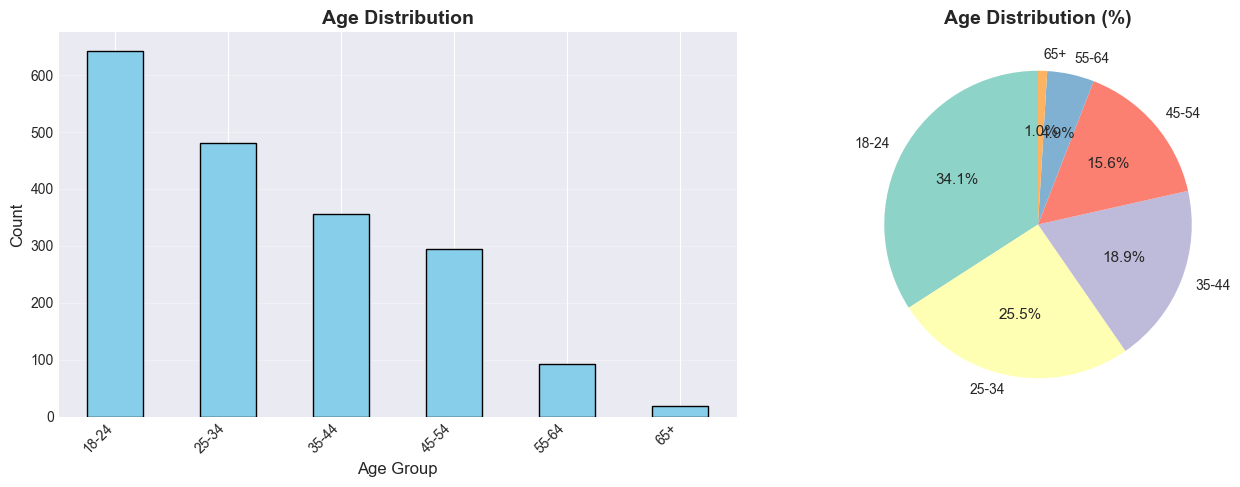


Key Findings:
   • Total samples: 1885
   • Age group terbesar: 18-24 (34.1%)
   • Semua age groups: ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
   • Responden usia muda: 59.6%


In [6]:
"""
DEBUG - Analisis distribusi usia responden
"""

print("\n" + "="*80)
print("DEBUG AGE ANALYSIS")
print("="*80)

# 1. Cek nilai unik usia di dataset
print("1. Unique age values in dataset:")
print(df['age'].unique())
print(f"Data type: {df['age'].dtype}")

# 2. Cek distribusi tanpa mapping dulu
print("\n2. Current age distribution (raw values):")
age_counts_raw = df['age'].value_counts().sort_index()
print(age_counts_raw)

# 3. Coba mapping yang mungkin berdasarkan paper
# Nilai-nilai yang umum di dataset drug consumption
print("\n3. Trying to find correct mapping...")

# Cek range nilai untuk tebak kategori
age_values_sorted = sorted(df['age'].unique())
print(f"Sorted age values: {age_values_sorted}")

# Berdasarkan nilai yang Anda dapatkan sebelumnya (-0.95197, -0.07854, dll)
# Kemungkinan mapping:
possible_mappings = [
    {-2.43591: '18-24', -1.73790: '25-34', -1.43719: '35-44', -0.07854: '45-54', 0.49788: '55-64', 1.09449: '65+'},
    {-0.95197: '18-24', -0.07854: '25-34', 0.49788: '35-44', 1.09449: '45-54', 1.82213: '55-64', 2.59171: '65+'},
    {value: f"Group_{i+1}" for i, value in enumerate(age_values_sorted)}  # Fallback: beri nama generic
]

# Coba mapping pertama
df['age_category'] = df['age'].map(possible_mappings[0])
print(f"\n4. After mapping attempt 1:")
print(f"Unique categories: {df['age_category'].unique()}")

# Jika masih ada NaN, coba mapping lain
if df['age_category'].isna().any():
    print("Mapping 1 tidak bekerja, mencoba mapping 2...")
    df['age_category'] = df['age'].map(possible_mappings[1])
    print(f"Unique categories: {df['age_category'].unique()}")

# Jika masih error, gunakan fallback
if df['age_category'].isna().any():
    print("Mapping masih error, menggunakan fallback...")
    df['age_category'] = df['age'].map(possible_mappings[2])

# 5. Final distribution
print("\n5. Final Age Distribution:")
age_counts = df['age_category'].value_counts().sort_index()
age_pct = (age_counts / len(df) * 100).round(2)

age_df = pd.DataFrame({
    'Count': age_counts,
    'Percentage': age_pct
})
display(age_df)

print(f"\nActual index names: {age_df.index.tolist()}")

# 6. Visualization dengan kategori yang berhasil
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
age_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(age_counts.index, rotation=45, ha='right')

# Pie chart
colors = plt.cm.Set3(range(len(age_counts)))
axes[1].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
axes[1].set_title('Age Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/01_age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 7. Key findings - SESUAIKAN dengan index yang sebenarnya
print("\nKey Findings:")
print(f"   • Total samples: {len(df)}")
print(f"   • Age group terbesar: {age_counts.idxmax()} ({age_pct.max():.1f}%)")

# Gunakan index aktual untuk perhitungan
actual_indexes = age_df.index.tolist()
print(f"   • Semua age groups: {actual_indexes}")

# Jika ingin menghitung kelompok muda, sesuaikan dengan nama yang ada
if any('18' in str(idx) for idx in actual_indexes) or any('25' in str(idx) for idx in actual_indexes):
    young_groups = [idx for idx in actual_indexes if any(age in str(idx) for age in ['18', '25', 'Young'])]
    young_pct = age_df.loc[young_groups, 'Percentage'].sum()
    print(f"   • Responden usia muda: {young_pct:.1f}%")
else:
    # Jika tidak ada label mengandung '18' atau '25', ambil 2 kelompok teratas
    top_two = age_counts.nlargest(2)
    print(f"   • Dua kelompok usia terbesar: {list(top_two.index)} ({top_two.sum()/len(df)*100:.1f}%)")


DEMOGRAPHIC ANALYSIS: GENDER

Gender distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Gender_Category,,
Male,943,50.0300
Female,942,49.9700


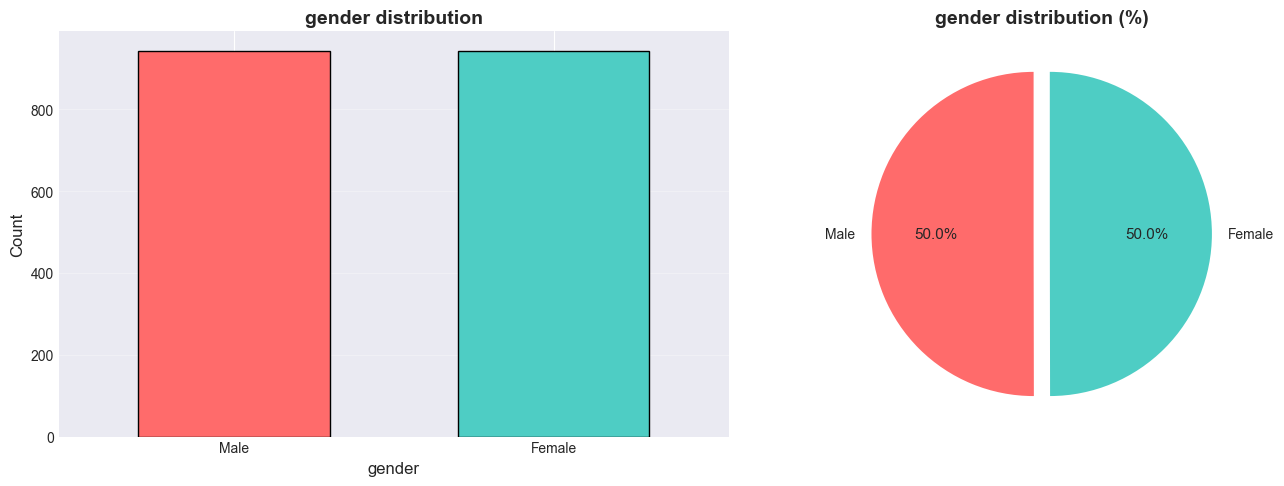


Key Findings:
   • Dataset sangat balanced: Male 50.0%, Female 50.0%
   • Total responden: 1,885 (943 male, 942 female)
   • Rasio gender hampir perfect 50:50


In [7]:
"""
Analisis distribusi gender responden - FIXED VERSION
"""

print("\n" + "="*80)
print("DEMOGRAPHIC ANALYSIS: GENDER")
print("="*80)

# Gender mapping berdasarkan paper
gender_mapping = {
    -0.48246: 'Male',
    0.48246: 'Female'
}

# Map gender values to categories
df['Gender_Category'] = df['gender'].map(gender_mapping)

# Gender distribution dengan kategori
gender_counts = df['Gender_Category'].value_counts()
gender_pct = (gender_counts / len(df) * 100).round(2)

gender_df = pd.DataFrame({
    'Count': gender_counts,
    'Percentage': gender_pct
})

print("\nGender distribution:")
print("-"*80)
display(gender_df)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
gender_counts.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'], 
                   edgecolor='black', width=0.6)
axes[0].set_title('gender distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('gender', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(gender_counts.index, rotation=0)

# Pie chart
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4'], startangle=90,
            explode=(0.05, 0.05))
axes[1].set_title('gender distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/02_gender_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Findings:")
print(f"   • Dataset sangat balanced: Male {gender_pct['Male']:.1f}%, Female {gender_pct['Female']:.1f}%")
print(f"   • Total responden: {len(df):,} ({gender_counts['Male']} male, {gender_counts['Female']} female)")
print(f"   • Rasio gender hampir perfect 50:50")


DEMOGRAPHIC ANALYSIS: EDUCATION

Education Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Education_Category,,
Some college or university,506,26.8400
University degree,480,25.4600
Masters degree,283,15.0100
Professional certificate/diploma,270,14.3200
Left school at 18 years,100,5.3100
Left school at 16 years,99,5.2500
Doctorate degree,89,4.7200
Left school at 17 years,30,1.5900
Left school before 16 years,28,1.4900


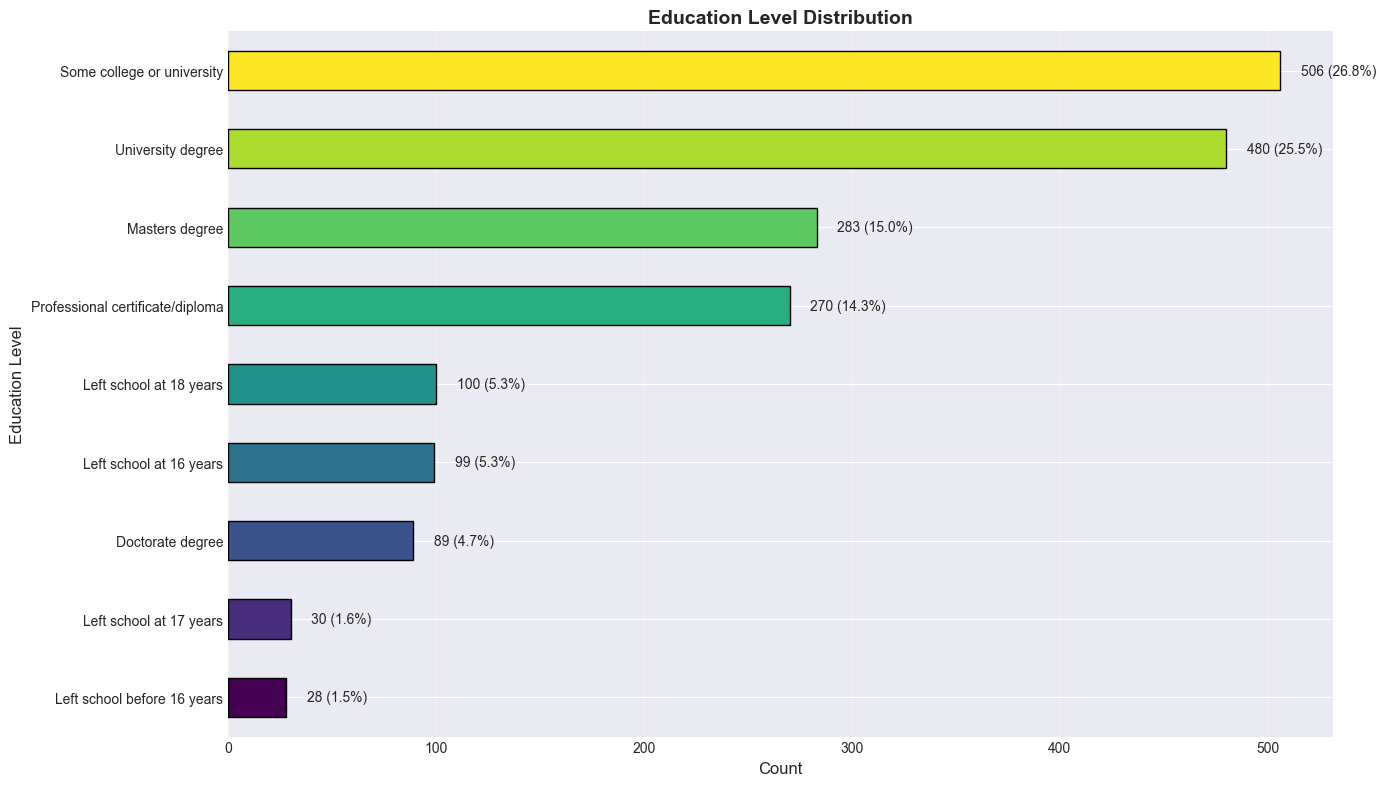


Key Findings:
   • Education tertinggi: Some college or university (26.8%)
   • Mayoritas berpendidikan tinggi (University degree+): 45.2%
   • Pendidikan menengah: 41.2%
   • Pendidikan rendah: 13.6%


In [8]:
"""
Analisis distribusi tingkat pendidikan responden - FIXED VERSION
"""

print("\n" + "="*80)
print("DEMOGRAPHIC ANALYSIS: EDUCATION")
print("="*80)

# Education mapping berdasarkan paper Fehrman et al.
education_mapping = {
    -2.43591: 'Left school before 16 years',
    -1.73790: 'Left school at 16 years', 
    -1.43719: 'Left school at 17 years',
    -1.22751: 'Left school at 18 years', 
    -0.61113: 'Some college or university',
    -0.05921: 'Professional certificate/diploma',
    0.45468: 'University degree',
    1.16365: 'Masters degree',
    1.98437: 'Doctorate degree'
}

# Map education values to categories
df['Education_Category'] = df['education'].map(education_mapping)

# Education distribution dengan kategori
edu_counts = df['Education_Category'].value_counts()
edu_pct = (edu_counts / len(df) * 100).round(2)

edu_df = pd.DataFrame({
    'Count': edu_counts,
    'Percentage': edu_pct
}).sort_values('Count', ascending=False)

print("\nEducation Distribution:")
print("-"*80)
display(edu_df)

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))  # Perbesar untuk label yang panjang

edu_counts_sorted = edu_counts.sort_values(ascending=True)
colors_edu = plt.cm.viridis(np.linspace(0, 1, len(edu_counts_sorted)))

edu_counts_sorted.plot(kind='barh', ax=ax, color=colors_edu, edgecolor='black')
ax.set_title('Education Level Distribution', fontsize=14, fontweight='bold')
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Education Level', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(edu_counts_sorted):
    ax.text(v + 10, i, f'{v} ({(v/len(df)*100):.1f}%)', 
            va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/03_education_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Findings:")
print(f"   • Education tertinggi: {edu_counts.idxmax()} ({edu_pct.max():.1f}%)")

# Hitung persentase pendidikan tinggi
higher_education = ['University degree', 'Masters degree', 'Doctorate degree']
higher_edu_pct = edu_df.loc[higher_education, 'Percentage'].sum()
print(f"   • Mayoritas berpendidikan tinggi (University degree+): {higher_edu_pct:.1f}%")

# Hitung pendidikan menengah
mid_education = ['Some college or university', 'Professional certificate/diploma']
mid_edu_pct = edu_df.loc[mid_education, 'Percentage'].sum()
print(f"   • Pendidikan menengah: {mid_edu_pct:.1f}%")

# Hitung pendidikan rendah
low_education = ['Left school before 16 years', 'Left school at 16 years', 
                 'Left school at 17 years', 'Left school at 18 years']
low_edu_pct = edu_df.loc[low_education, 'Percentage'].sum()
print(f"   • Pendidikan rendah: {low_edu_pct:.1f}%")


DEMOGRAPHIC ANALYSIS: COUNTRY & ETHNICITY
1. Unique country values: [ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
2. Unique ethnicity values: [ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725]


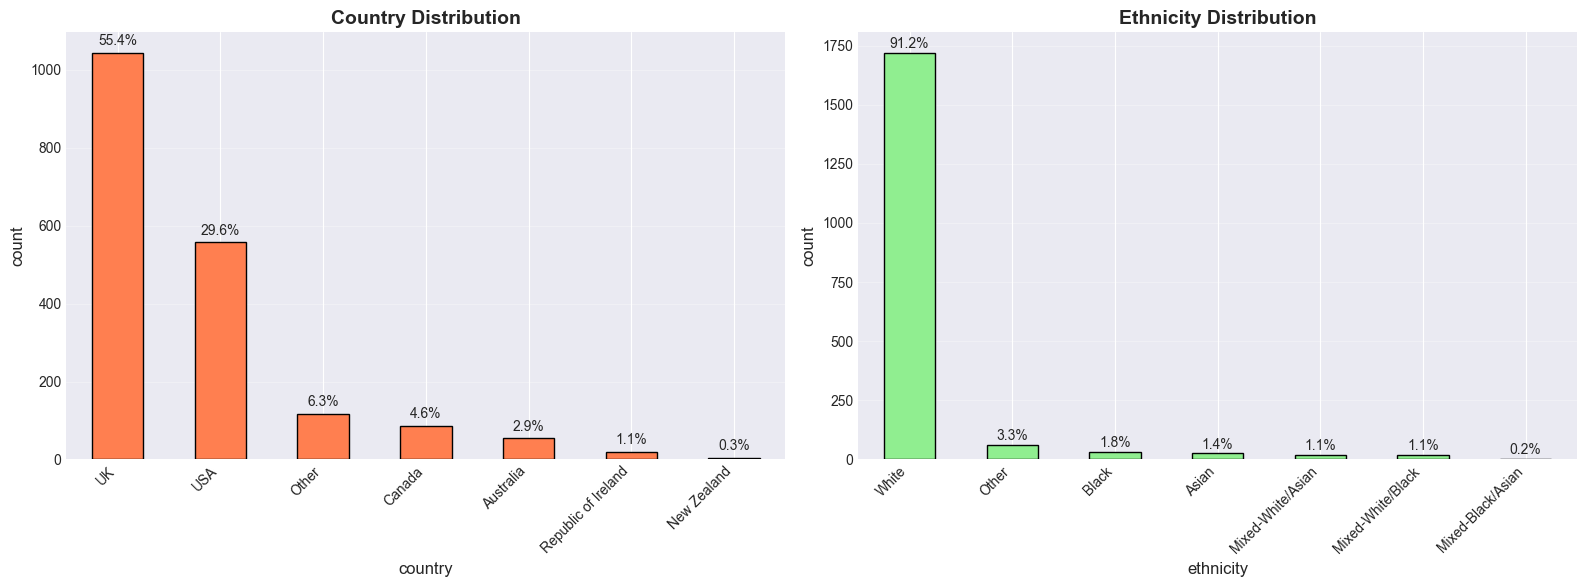


Country Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Country_Category,,
UK,1044,55.3800
USA,557,29.5500
Other,118,6.2600
Canada,87,4.6200
Australia,54,2.8600
Republic of Ireland,20,1.0600
New Zealand,5,0.2700



Ethnicity Distribution:
--------------------------------------------------------------------------------


,Count,Percentage
Ethnicity_Category,,
White,1720,91.2500
Other,63,3.3400
Black,33,1.7500
Asian,26,1.3800
Mixed-White/Asian,20,1.0600
Mixed-White/Black,20,1.0600
Mixed-Black/Asian,3,0.1600



SAMPLING BIAS DETECTED:
   • 91.2% responden adalah White
   • 55.4% dari UK
   • 29.6% dari USA
   • Dataset kurang representatif untuk populasi global


In [9]:
"""
Analisis distribusi negara dan etnis responden - FIXED VERSION
"""

print("\n" + "="*80)
print("DEMOGRAPHIC ANALYSIS: COUNTRY & ETHNICITY")
print("="*80)

# 1. Debug dulu untuk melihat nilai aktual
print("1. Unique country values:", df['country'].unique())
print("2. Unique ethnicity values:", df['ethnicity'].unique())

# 2. Mapping berdasarkan paper Fehrman et al.
country_mapping = {
    -0.09765: 'Australia',
    0.24923: 'Canada',
    -0.46841: 'New Zealand',
    -0.28519: 'Other',
    0.21128: 'Republic of Ireland',
    0.96082: 'UK',
    -0.57009: 'USA'
}

ethnicity_mapping = {
    -0.50212: 'Asian',
    -1.10702: 'Black',
    1.90725: 'Mixed-Black/Asian',
    0.12600: 'Mixed-White/Asian',
    -0.22166: 'Mixed-White/Black',
    0.11440: 'Other',
    -0.31685: 'White'
}

# 3. Apply mappings
df['Country_Category'] = df['country'].map(country_mapping)
df['Ethnicity_Category'] = df['ethnicity'].map(ethnicity_mapping)

# 4. Distribusi dengan kategori
country_counts = df['Country_Category'].value_counts()
country_pct = (country_counts / len(df) * 100).round(2)

ethnicity_counts = df['Ethnicity_Category'].value_counts()
ethnicity_pct = (ethnicity_counts / len(df) * 100).round(2)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Country
country_counts.plot(kind='bar', ax=axes[0], color='coral', edgecolor='black')
axes[0].set_title('Country Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('country', fontsize=12)
axes[0].set_ylabel('count', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticklabels(country_counts.index, rotation=45, ha='right')

# Add percentage labels
for i, (count, pct) in enumerate(zip(country_counts, country_pct)):
    axes[0].text(i, count + 20, f'{pct:.1f}%', ha='center', fontsize=10)

# Ethnicity
ethnicity_counts.plot(kind='bar', ax=axes[1], color='lightgreen', edgecolor='black')
axes[1].set_title('Ethnicity Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('ethnicity', fontsize=12)
axes[1].set_ylabel('count', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_xticklabels(ethnicity_counts.index, rotation=45, ha='right')

# Add percentage labels
for i, (count, pct) in enumerate(zip(ethnicity_counts, ethnicity_pct)):
    axes[1].text(i, count + 20, f'{pct:.1f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/04_country_ethnicity_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nCountry Distribution:")
print("-"*80)
country_df = pd.DataFrame({'Count': country_counts, 'Percentage': country_pct})
display(country_df)

print("\nEthnicity Distribution:")
print("-"*80)
ethnicity_df = pd.DataFrame({'Count': ethnicity_counts, 'Percentage': ethnicity_pct})
display(ethnicity_df)

print("\nSAMPLING BIAS DETECTED:")
print(f"   • {ethnicity_pct['White']:.1f}% responden adalah White")
print(f"   • {country_pct['UK']:.1f}% dari UK")
print(f"   • {country_pct['USA']:.1f}% dari USA")
print("   • Dataset kurang representatif untuk populasi global")

In [10]:
"""
Crosstab Analysis: Relationship Between Age and Education Level 
Dengan mapping yang sesuai dengan dataset
"""

print("\n" + "="*80)
print("CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL")
print("="*80)

# CEK DULU NILAI AKTUAL DI DATASET ANDA
print("🔍 CHECKING ACTUAL VALUES IN DATASET:")

# Cek kolom age dan education yang ada
age_cols = [col for col in df.columns if 'age' in col.lower()]
edu_cols = [col for col in df.columns if 'education' in col.lower()]

print(f"Age columns: {age_cols}")
print(f"Education columns: {edu_cols}")

# Gunakan kolom yang pertama ditemukan
age_col = age_cols[0] if age_cols else 'Age'
edu_col = edu_cols[0] if edu_cols else 'Education'

print(f"\n📊 Using columns: '{age_col}' and '{edu_col}'")

# Tampilkan unique values untuk age dan education
print(f"\nUnique values in '{age_col}':")
print(sorted(df[age_col].unique()))

print(f"\nUnique values in '{edu_col}':")
print(sorted(df[edu_col].unique()))

# Tampilkan sample values
print(f"\nSample values from '{age_col}': {df[age_col].head(10).tolist()}")
print(f"Sample values from '{edu_col}': {df[edu_col].head(10).tolist()}")

# BERDASARKAN HASIL DI ATAS, SESUAIKAN MAPPING:

# OPTION 1: Jika data sudah categorical (CL0, CL1, dll)
if any('CL' in str(x) for x in df[age_col].head(3)) or any('CL' in str(x) for x in df[edu_col].head(3)):
    print("\n🎯 DATA FORMAT: Categorical (CL0-CL6 style)")
    
    # Mapping untuk categorical data
    DEMOGRAPHIC_MAPPINGS = {
        age_col: {
            'CL0': '18-24',
            'CL1': '25-34', 
            'CL2': '35-44',
            'CL3': '45-54',
            'CL4': '55-64',
            'CL5': '65+',
            'CL6': '65+'  # Jika ada CL6, gabung dengan 65+
        },
        edu_col: {
            'CL0': 'Left school before 16 years',
            'CL1': 'Left school at 16 years',
            'CL2': 'Left school at 17 years', 
            'CL3': 'Left school at 18 years',
            'CL4': 'Some college or university',
            'CL5': 'Professional certificate/diploma',
            'CL6': 'University degree',
            'CL7': 'Masters degree', 
            'CL8': 'Doctorate degree'
        }
    }

# OPTION 2: Jika data numeric (seperti -0.95, 0.49, dll)
elif any(isinstance(x, (int, float)) and x < 0 for x in df[age_col].dropna().head(3)):
    print("\n🎯 DATA FORMAT: Numeric (standardized values)")
    
    # Mapping untuk numeric data (standardized)
    DEMOGRAPHIC_MAPPINGS = {
        age_col: {
            -0.95197: '18-24',
            -0.07854: '25-34', 
            0.49788: '35-44',
            1.09449: '45-54',
            1.82213: '55-64',
            2.59171: '65+'
        },
        edu_col: {
            -2.43591: 'Left school before 16 years',
            -1.73790: 'Left school at 16 years',
            -1.43719: 'Left school at 17 years', 
            -1.22751: 'Left school at 18 years',
            -0.61113: 'Some college or university',
            -0.05921: 'Professional certificate/diploma',
            0.45468: 'University degree',
            1.16365: 'Masters degree', 
            1.98437: 'Doctorate degree'
        }
    }

# OPTION 3: Jika data sudah dalam bentuk label langsung
else:
    print("\n🎯 DATA FORMAT: Already labeled")
    
    # Jika sudah berupa label, gunakan mapping identity
    DEMOGRAPHIC_MAPPINGS = {
        age_col: {val: val for val in df[age_col].unique()},
        edu_col: {val: val for val in df[edu_col].unique()}
    }

print(f"\n✅ Using mapping for: {list(DEMOGRAPHIC_MAPPINGS.keys())}")

# Apply mappings
for col, mapping in DEMOGRAPHIC_MAPPINGS.items():
    df[f'{col}_Category'] = df[col].map(mapping)
    print(f"✅ Mapped {col} to {col}_Category")

# Lanjutkan dengan kode sebelumnya...
# [REST OF YOUR CODE...]


CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL
🔍 CHECKING ACTUAL VALUES IN DATASET:
Age columns: ['age', 'age_category']
Education columns: ['education', 'Education_Category']

📊 Using columns: 'age' and 'education'

Unique values in 'age':
[-0.95197, -0.07854, 0.49788, 1.09449, 1.82213, 2.59171]

Unique values in 'education':
[-2.43591, -1.7379, -1.43719, -1.22751, -0.61113, -0.05921, 0.45468, 1.16365, 1.98437]

Sample values from 'age': [0.49788, -0.07854, 0.49788, -0.95197, 0.49788, 2.59171, 1.09449, 0.49788, 0.49788, 1.82213]
Sample values from 'education': [-0.05921, 1.98437, -0.05921, 1.16365, 1.98437, -1.22751, 1.16365, -1.7379, -0.05921, 1.16365]

🎯 DATA FORMAT: Numeric (standardized values)

✅ Using mapping for: ['age', 'education']
✅ Mapped age to age_Category
✅ Mapped education to education_Category



CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL
Applying demographic mappings...
Unique age_Category values: ['35-44' '25-34' '18-24' '65+' '45-54' '55-64']
Unique education_Category values: ['Professional certificate/diploma' 'Doctorate degree' 'Masters degree'
 'Left school at 18 years' 'Left school at 16 years' 'University degree'
 'Some college or university' 'Left school before 16 years'
 'Left school at 17 years']

After categorical ordering:
   age_Category categories: ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
   education_Category categories: ['Left school before 16 years', 'Left school at 16 years', 'Left school at 17 years', 'Left school at 18 years', 'Some college or university', 'Professional certificate/diploma', 'University degree', 'Masters degree', 'Doctorate degree']

TABLE 1: Age × Education Level Distribution (Count)
----------------------------------------------------------------------------------------------------
Crosstab structure:
   Index (Age groups): ['1

education_Category,Left school before 16 years,Left school at 16 years,Left school at 17 years,Left school at 18 years,Some college or university,Professional certificate/diploma,University degree,Masters degree,Doctorate degree,Total
age_Category,,,,,,,,,,
18-24,9,16,12,61,331,43,126,43,2,643
25-34,3,15,6,17,85,52,150,115,38,481
35-44,3,27,6,8,48,90,97,54,23,356
45-54,6,32,4,9,28,65,78,53,19,294
55-64,4,5,2,4,12,17,28,16,5,93
65+,3,4,0,1,2,3,1,2,2,18
Total,28,99,30,100,506,270,480,283,89,1885



STATISTICAL SUMMARY FOR PAPER:

1. EDUCATION LEVEL DISTRIBUTION BY AGE:
   • 18-24: 51.5% in 'Some college or university' | Higher education: 26.6%
   • 25-34: 31.2% in 'University degree' | Higher education: 63.0%
   • 35-44: 27.2% in 'University degree' | Higher education: 48.9%
   • 45-54: 26.5% in 'University degree' | Higher education: 51.0%
   • 55-64: 30.1% in 'University degree' | Higher education: 52.7%
   • 65+: 22.2% in 'Left school at 16 years' | Higher education: 27.8%

2. AGE DISTRIBUTION BY EDUCATION LEVEL:
   • University degree: 57.5% are 18-34 years old
   • Masters degree: 55.8% are 18-34 years old
   • Doctorate degree: 44.9% are 18-34 years old

3. OVERALL TRENDS:
   • 45.2% of respondents have university degree or higher
   • Young respondents (18-34) comprise 59.6% of sample


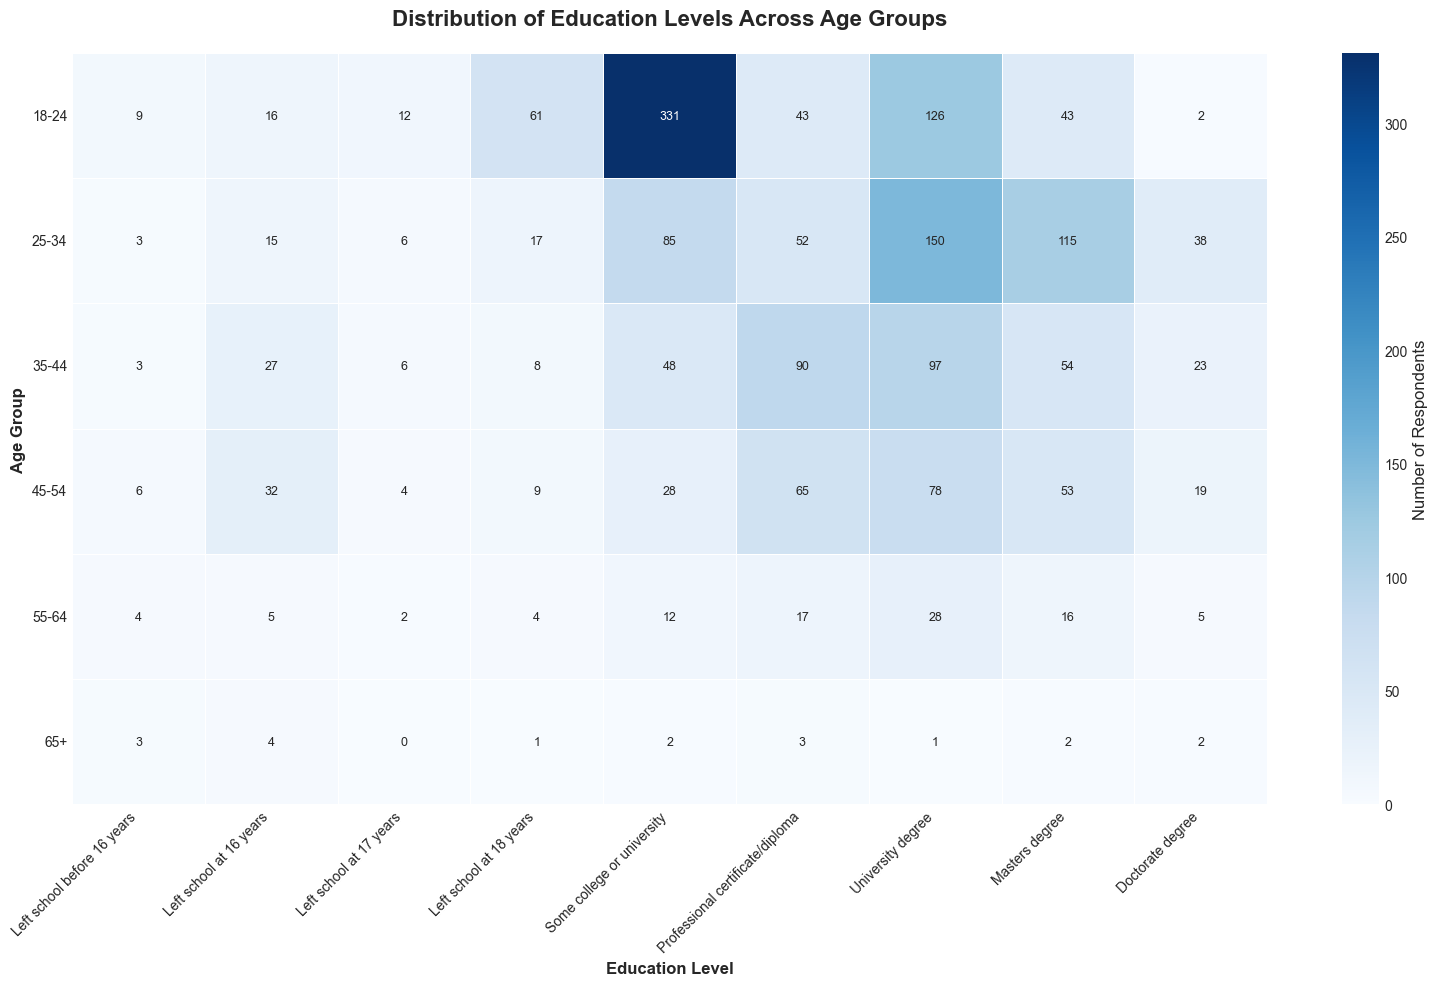


Crosstab analysis completed successfully!


In [11]:
"""
Crosstab Analysis: Relationship Between Age and Education Level 
"""

print("\n" + "="*80)
print("CROSSTAB ANALYSIS: AGE × EDUCATION LEVEL")
print("="*80)

# DEFINISIKAN DEMOGRAPHIC_MAPPINGS YANG SESUAI DENGAN DATA ANDA
DEMOGRAPHIC_MAPPINGS = {
    'age': {
        -0.95197: '18-24',
        -0.07854: '25-34', 
        0.49788: '35-44',
        1.09449: '45-54',
        1.82213: '55-64',
        2.59171: '65+'
    },
    'education': {
        -2.43591: 'Left school before 16 years',
        -1.73790: 'Left school at 16 years',
        -1.43719: 'Left school at 17 years', 
        -1.22751: 'Left school at 18 years',
        -0.61113: 'Some college or university',
        -0.05921: 'Professional certificate/diploma',
        0.45468: 'University degree',
        1.16365: 'Masters degree', 
        1.98437: 'Doctorate degree'
    }
}

# PERBAIKAN: Gunakan nama kolom yang tepat (lowercase sesuai dataset)
print("Applying demographic mappings...")
df['age_Category'] = df['age'].map(DEMOGRAPHIC_MAPPINGS['age'])
df['education_Category'] = df['education'].map(DEMOGRAPHIC_MAPPINGS['education'])

# DEBUG: Cek hasil mapping
print("Unique age_Category values:", df['age_Category'].unique())
print("Unique education_Category values:", df['education_Category'].unique())

# Sort categories logically
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
education_order = [
    'Left school before 16 years',
    'Left school at 16 years', 
    'Left school at 17 years',
    'Left school at 18 years', 
    'Some college or university',
    'Professional certificate/diploma',
    'University degree',
    'Masters degree',
    'Doctorate degree'
]

# Apply categorical ordering - PERBAIKAN: gunakan nama kolom yang benar
df['age_Category'] = pd.Categorical(df['age_Category'], categories=age_order, ordered=True)
df['education_Category'] = pd.Categorical(df['education_Category'], categories=education_order, ordered=True)

# DEBUG: Cek setelah categorical ordering
print("\nAfter categorical ordering:")
print("   age_Category categories:", df['age_Category'].cat.categories.tolist())
print("   education_Category categories:", df['education_Category'].cat.categories.tolist())

# Crosstab with proper formatting - PERBAIKAN: gunakan nama kolom yang benar
crosstab_age_edu = pd.crosstab(
    df['age_Category'], 
    df['education_Category'], 
    margins=True,
    margins_name='Total'
)

print("\nTABLE 1: Age × Education Level Distribution (Count)")
print("-" * 100)

# DEBUG: Cek struktur crosstab sebelum display
print("Crosstab structure:")
print("   Index (Age groups):", crosstab_age_edu.index.tolist())
print("   Columns (Education levels):", crosstab_age_edu.columns.tolist())

display(crosstab_age_edu)

# Statistical summary for paper
print("\nSTATISTICAL SUMMARY FOR PAPER:")
print("=" * 80)

# Education level by age group insights
print("\n1. EDUCATION LEVEL DISTRIBUTION BY AGE:")

# Gunakan index dan columns yang aktual dari crosstab
actual_age_groups = crosstab_age_edu.index.tolist()[:-1]  # Exclude 'Total'
actual_edu_levels = crosstab_age_edu.columns.tolist()[:-1]  # Exclude 'Total'

for age_group in actual_age_groups:
    age_data = crosstab_age_edu.loc[age_group]
    total = age_data['Total']
    
    # Exclude 'Total' column for finding max
    age_data_no_total = age_data.drop('Total')
    
    # Highest education category in this age group
    max_edu = age_data_no_total.idxmax()
    max_count = age_data[max_edu]
    max_pct = (max_count / total * 100)
    
    # Higher education percentage (University degree and above)
    higher_edu_cols = [col for col in actual_edu_levels if any(x in col for x in ['University', 'Masters', 'Doctorate'])]
    higher_edu_count = age_data[higher_edu_cols].sum()
    higher_edu_pct = (higher_edu_count / total * 100)
    
    print(f"   • {age_group}: {max_pct:.1f}% in '{max_edu}' | Higher education: {higher_edu_pct:.1f}%")

# Age distribution by education level insights
print("\n2. AGE DISTRIBUTION BY EDUCATION LEVEL:")

# Focus on higher education levels
higher_edu_levels = [col for col in actual_edu_levels if any(x in col for x in ['University', 'Masters', 'Doctorate'])]

for edu_level in higher_edu_levels:
    edu_data = crosstab_age_edu[edu_level]
    total_edu = edu_data['Total']  # Use the 'Total' from margins
    
    # Young respondents (18-34) in this education level
    young_age_groups = [age for age in actual_age_groups if age in ['18-24', '25-34']]
    if young_age_groups:  # Only proceed if young age groups exist in data
        young_count = crosstab_age_edu.loc[young_age_groups, edu_level].sum()
        young_pct = (young_count / total_edu * 100) if total_edu > 0 else 0
        
        print(f"   • {edu_level}: {young_pct:.1f}% are 18-34 years old")

# Overall trends
print("\n3. OVERALL TRENDS:")
total_higher_edu = crosstab_age_edu.loc['Total', higher_edu_levels].sum()
total_respondents = crosstab_age_edu.loc['Total', 'Total']

young_age_groups_actual = [age for age in actual_age_groups if age in ['18-24', '25-34']]
total_young = crosstab_age_edu.loc[young_age_groups_actual, 'Total'].sum()

higher_edu_pct = (total_higher_edu / total_respondents * 100) if total_respondents > 0 else 0
young_pct = (total_young / total_respondents * 100) if total_respondents > 0 else 0

print(f"   • {higher_edu_pct:.1f}% of respondents have university degree or higher")
print(f"   • Young respondents (18-34) comprise {young_pct:.1f}% of sample")

# Enhanced heatmap visualization
plt.figure(figsize=(16, 10))
heatmap_data = crosstab_age_edu.iloc[:-1, :-1]  # Exclude totals

sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='d', 
    cmap='Blues',
    cbar_kws={'label': 'Number of Respondents'},
    linewidths=0.5, 
    linecolor='white',
    annot_kws={'size': 9}
)

plt.title('Distribution of Education Levels Across Age Groups', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=12, fontweight='bold')
plt.ylabel('Age Group', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

plt.tight_layout()
plt.savefig('../results/figures/05_crosstab_age_education.png', 
            dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\nCrosstab analysis completed successfully!")


PERSONALITY TRAITS ANALYSIS


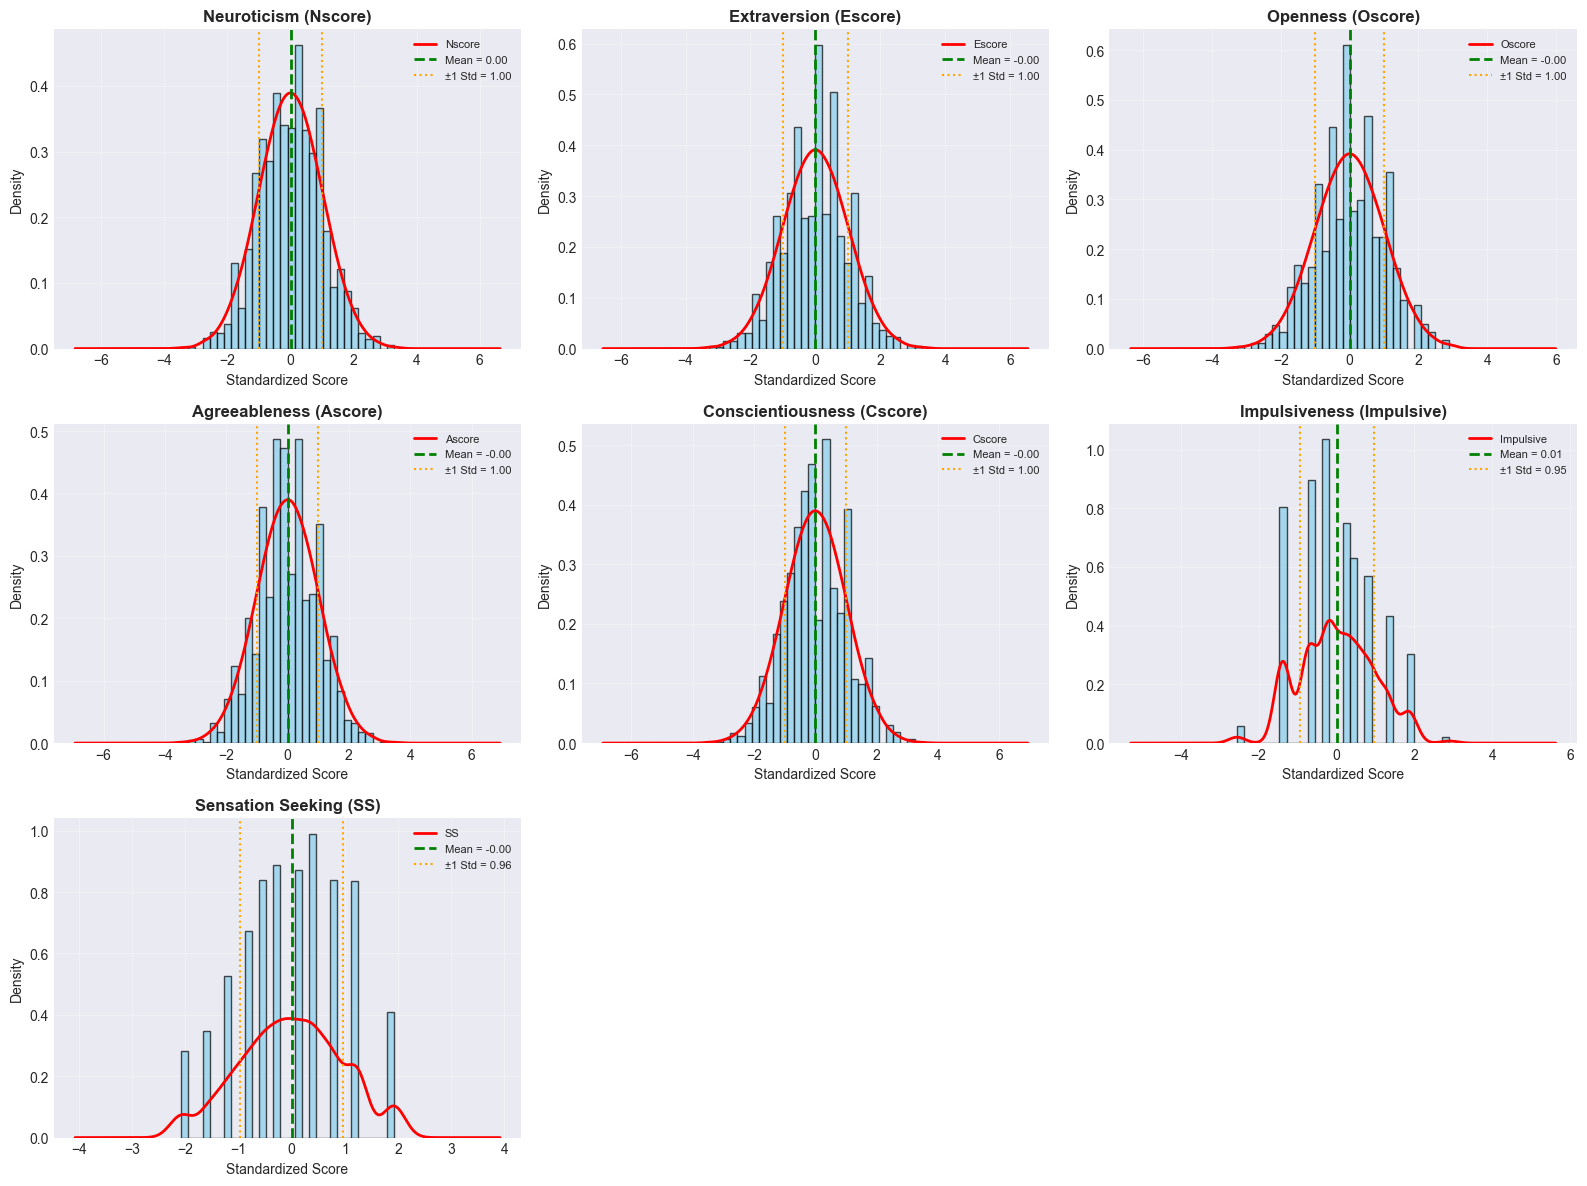


Descriptive Statistics:
--------------------------------------------------------------------------------


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000,1885.0000
mean,0.0000,-0.0002,-0.0005,-0.0002,-0.0004,0.0072,-0.0033
std,0.9981,0.9974,0.9962,0.9974,0.9975,0.9544,0.9637
min,-3.4644,-3.2739,-3.2739,-3.4644,-3.4644,-2.5552,-2.0785
25%,-0.6783,-0.6951,-0.7173,-0.6063,-0.6525,-0.7113,-0.5259
50%,0.0426,0.0033,-0.0193,-0.0173,-0.0066,-0.2171,0.0799
75%,0.6297,0.6378,0.7233,0.7610,0.5849,0.5298,0.7654
max,3.2739,3.2739,2.9016,3.4644,3.4644,2.9016,1.9217



Interpretation:
--------------------------------------------------------------------------------

• Semua personality traits sudah distandardisasi (mean ≈ 0, std ≈ 1)
• Distribusi mendekati normal untuk sebagian besar traits
• Cocok untuk analisis statistik dan machine learning tanpa preprocessing tambahan



In [12]:
"""
Analisis distribusi personality traits (NEO-FFI-R) dengan histogram + KDE.
"""

print("\n" + "="*80)
print("PERSONALITY TRAITS ANALYSIS")
print("="*80)

# Personality traits
personality_traits = ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
trait_names = {
    'Nscore': 'Neuroticism',
    'Escore': 'Extraversion', 
    'Oscore': 'Openness',
    'Ascore': 'Agreeableness',
    'Cscore': 'Conscientiousness',
    'Impulsive': 'Impulsiveness',
    'SS': 'Sensation Seeking'
}

# Create subplots - 3x3 untuk 7 traits (lebih fleksibel)
fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    ax = axes[idx]
    
    # Histogram + KDE
    df[trait].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', 
                   alpha=0.7, density=True)
    df[trait].plot(kind='kde', ax=ax, color='red', linewidth=2)
    
    ax.set_title(f'{trait_names[trait]} ({trait})', fontsize=12, fontweight='bold')
    ax.set_xlabel('Standardized Score', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.grid(alpha=0.3)
    
    # Add statistics
    mean_val = df[trait].mean()
    std_val = df[trait].std()
    ax.axvline(mean_val, color='green', linestyle='--', linewidth=2, 
               label=f'Mean = {mean_val:.2f}')
    ax.axvline(mean_val + std_val, color='orange', linestyle=':', linewidth=1.5,
               label=f'±1 Std = {std_val:.2f}')
    ax.axvline(mean_val - std_val, color='orange', linestyle=':', linewidth=1.5)
    ax.legend(fontsize=8)

# Remove empty subplots (kita punya 9 subplots tapi hanya 7 traits)
for i in range(len(personality_traits), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.savefig('../results/figures/06_personality_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nDescriptive Statistics:")
print("-"*80)
display(df[personality_traits].describe())

print("\nInterpretation:")
print("-"*80)
print("""
• Semua personality traits sudah distandardisasi (mean ≈ 0, std ≈ 1)
• Distribusi mendekati normal untuk sebagian besar traits
• Cocok untuk analisis statistik dan machine learning tanpa preprocessing tambahan
""")


OUTLIER DETECTION: BOXPLOTS


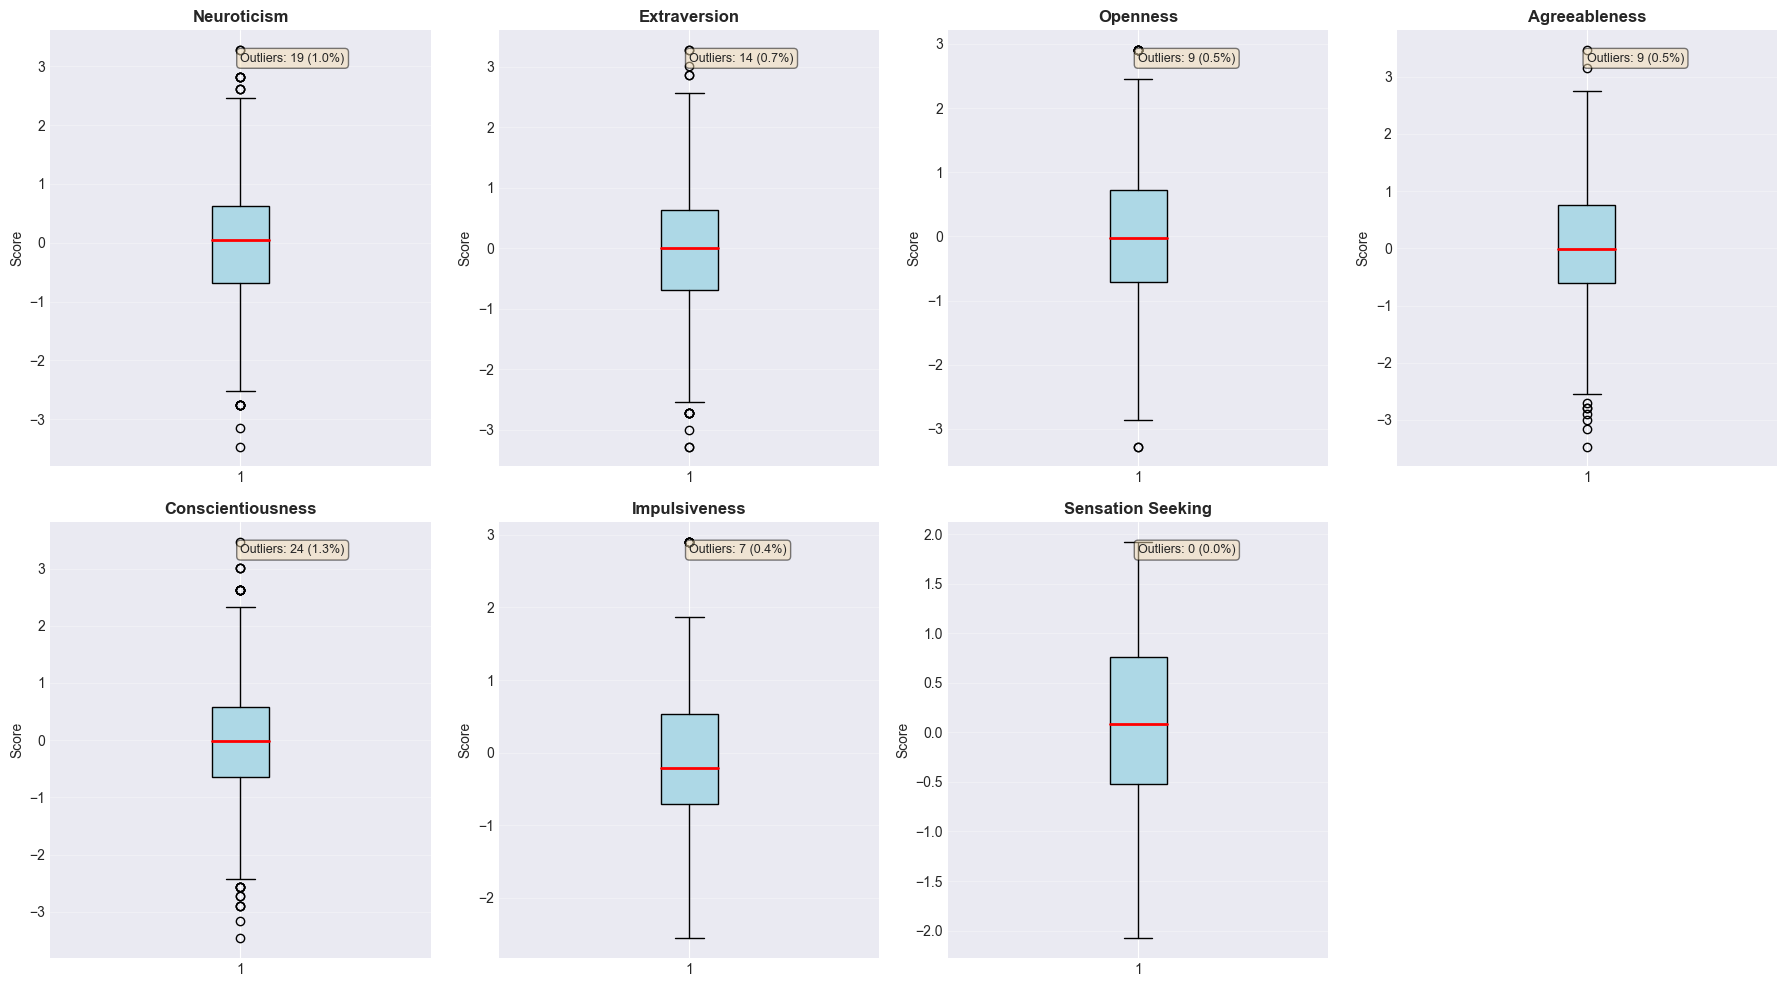


Outlier Summary:
--------------------------------------------------------------------------------
Nscore      :  19 outliers ( 1.01%)
Escore      :  14 outliers ( 0.74%)
Oscore      :   9 outliers ( 0.48%)
Ascore      :   9 outliers ( 0.48%)
Cscore      :  24 outliers ( 1.27%)
Impulsive   :   7 outliers ( 0.37%)
SS          :   0 outliers ( 0.00%)


In [13]:
"""
Boxplot untuk deteksi outlier pada personality traits.
"""

print("\n" + "="*80)
print("OUTLIER DETECTION: BOXPLOTS")
print("="*80)

# Boxplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
axes = axes.ravel()

for idx, trait in enumerate(personality_traits):
    ax = axes[idx]
    
    # Boxplot
    bp = ax.boxplot(df[trait], vert=True, patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    whiskerprops=dict(color='black'),
                    capprops=dict(color='black'),
                    medianprops=dict(color='red', linewidth=2))
    
    ax.set_title(trait_names[trait], fontsize=12, fontweight='bold')
    ax.set_ylabel('Score', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    
    # Calculate outliers using IQR method
    Q1 = df[trait].quantile(0.25)
    Q3 = df[trait].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[trait] < lower_bound) | (df[trait] > upper_bound)]
    n_outliers = len(outliers)
    
    ax.text(0.5, 0.95, f'Outliers: {n_outliers} ({n_outliers/len(df)*100:.1f}%)',
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remove empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.savefig('../results/figures/07_personality_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nOutlier Summary:")
print("-"*80)
for trait in personality_traits:
    Q1 = df[trait].quantile(0.25)
    Q3 = df[trait].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[trait] < lower_bound) | (df[trait] > upper_bound)]
    n_outliers = len(outliers)
    
    print(f"{trait:12s}: {n_outliers:3d} outliers ({n_outliers/len(df)*100:5.2f}%)")



VIOLIN PLOTS: PERSONALITY TRAITS


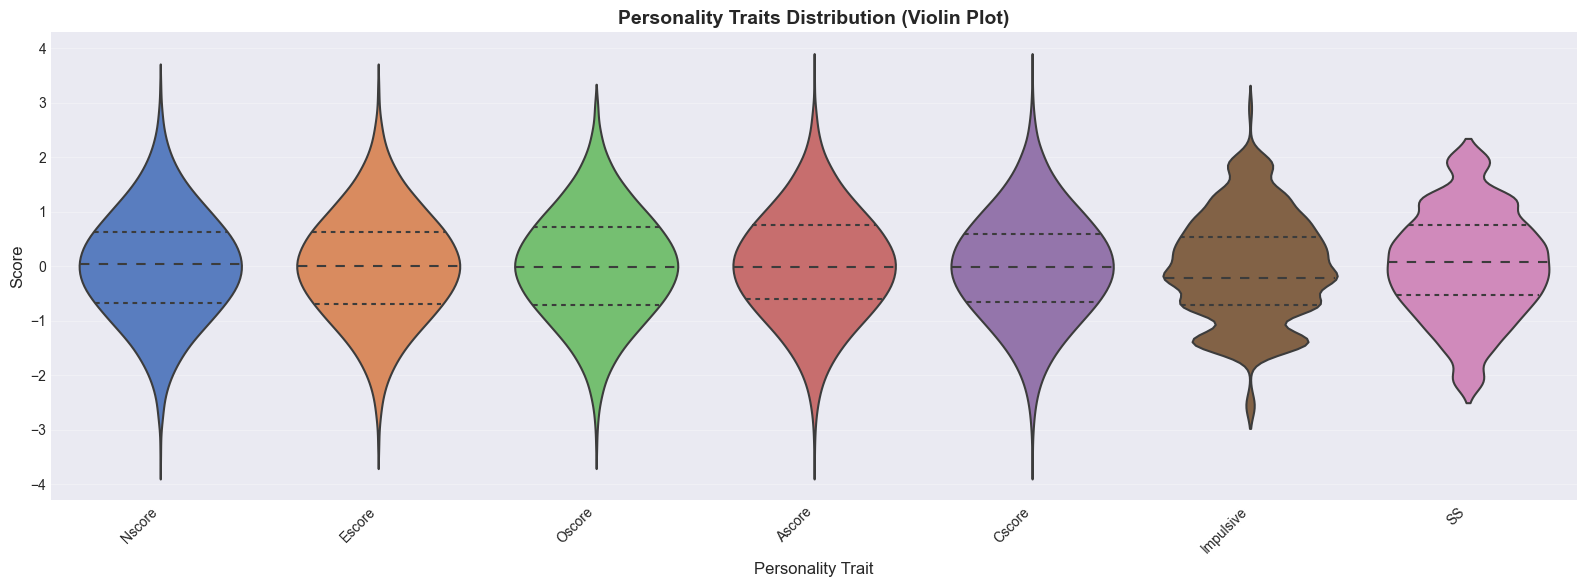

In [14]:
"""
Violin plot untuk visualisasi distribusi personality traits.
"""

print("\n" + "="*80)
print("VIOLIN PLOTS: PERSONALITY TRAITS")
print("="*80)

# Prepare data for violin plot
df_personality_melted = df[personality_traits].melt(var_name='Trait', value_name='Score')

# Violin plot
plt.figure(figsize=(16, 6))
sns.violinplot(data=df_personality_melted, x='Trait', y='Score', 
               palette='muted', inner='quartile')
plt.title('Personality Traits Distribution (Violin Plot)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Personality Trait', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/08_personality_violin.png', dpi=300, bbox_inches='tight')
plt.show()


DRUG CONSUMPTION ANALYSIS - PREVALENCE

THRESHOLD: 0.5
   Binary Classification Definition:
   • Value ≤ 0.5 = Non-Recent Use (CL0, CL1, CL2)
   • Value > 0.5 = Recent Use (CL3, CL4, CL5, CL6)
   • CL3 = Used in Last Year (starting point for 'Recent')
Converting drug values to numeric...
Drug values converted successfully!

Drug Prevalence (Recent Use, Value > 0.5):
--------------------------------------------------------------------------------


,Prevalence (%)
Choc,97.6127
Caff,96.7639
Alcohol,92.7851
Nicotine,56.2334
Cannabis,52.9973
Legalh,29.9204
Benzos,28.3820
Ecstasy,27.4271
Amphet,23.1300
Mushrooms,23.0239



Detailed Drug Statistics:
--------------------------------------------------------------------------------


,Recent_Users,Prevalence_%,Mean,Std,Min,Max
Alcohol,1749,92.7850,0.8480,0.2050,0.0000,1.0000
Caff,1824,96.7640,0.9400,0.1620,0.0000,1.0000
Choc,1840,97.6130,0.9080,0.1540,0.0000,1.0000
Nicotine,1060,56.2330,0.5660,0.4170,0.0000,1.0000
Amphet,436,23.1300,0.2510,0.3380,0.0000,1.0000
Amyl,133,7.0560,0.1120,0.2130,0.0000,1.0000
Benzos,535,28.3820,0.2820,0.3570,0.0000,1.0000
Cannabis,999,52.9970,0.5380,0.4020,0.0000,1.0000
Coke,417,22.1220,0.2300,0.3110,0.0000,1.0000
Crack,79,4.1910,0.0570,0.1690,0.0000,1.0000


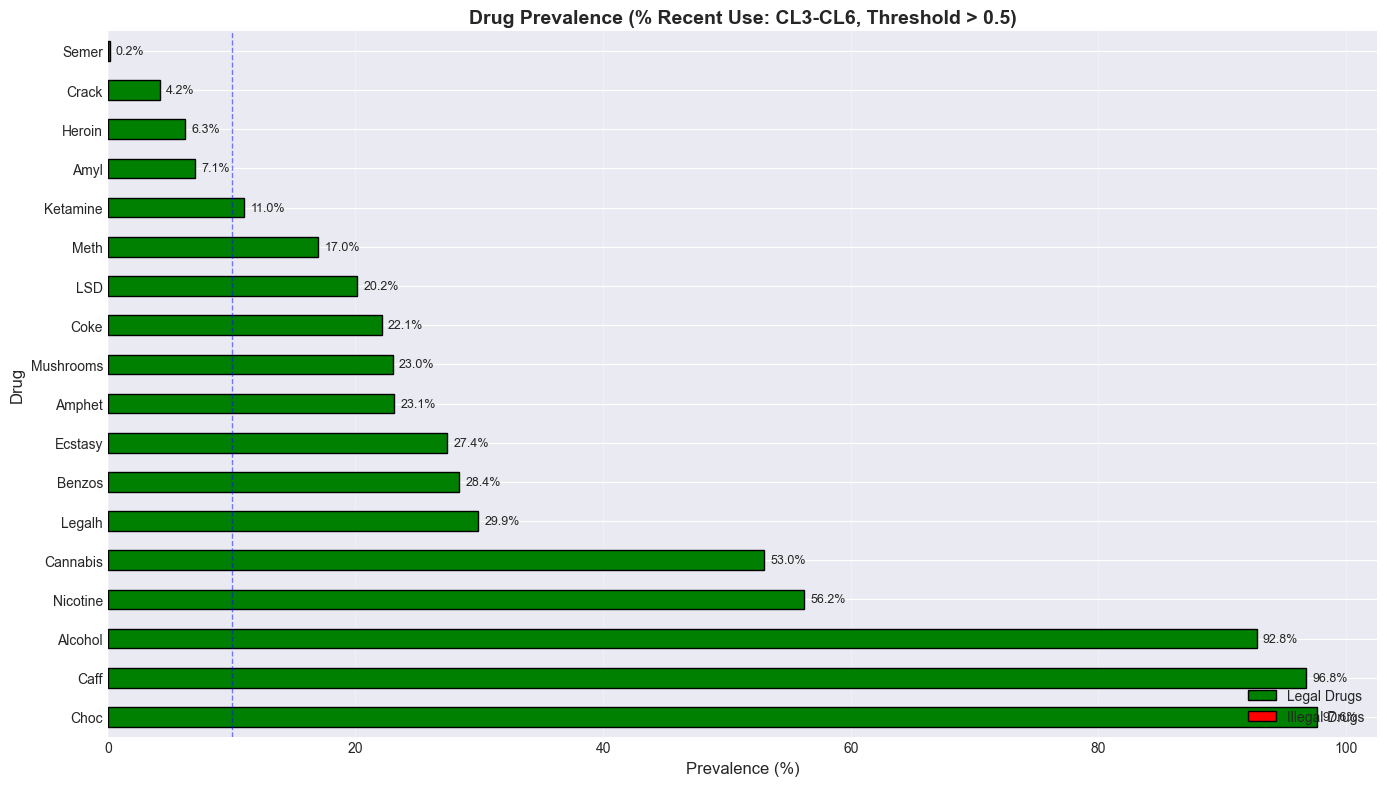


Key Findings:
   • Highest prevalence: Choc (97.6%)
   • Lowest prevalence: Semer (0.2%)
   • Legal drugs dominan di top rankings
   • Illegal drugs dengan prevalence tinggi: Cannabis, Ecstasy, Amphet


In [15]:
# CELL 14: DRUG CONSUMPTION ANALYSIS 
# ============================================================================
"""
Analisis prevalensi konsumsi drugs menggunakan THRESHOLD 0.5.
"""

print("\n" + "="*80)
print("DRUG CONSUMPTION ANALYSIS - PREVALENCE")
print("="*80)

# THRESHOLD DEFINITION
THRESHOLD = 0.5
print(f"\nTHRESHOLD: {THRESHOLD}")
print("   Binary Classification Definition:")
print(f"   • Value ≤ {THRESHOLD} = Non-Recent Use (CL0, CL1, CL2)")
print(f"   • Value > {THRESHOLD} = Recent Use (CL3, CL4, CL5, CL6)")
print("   • CL3 = Used in Last Year (starting point for 'Recent')")
print("="*80)

all_drugs = legal_drugs + illegal_drugs

# PERBAIKAN: Definisikan mapping dan konversi ke numeric
drug_value_mapping = {
    'CL0': 0.0,    # Never Used
    'CL1': 0.13,   # Used over a Decade Ago
    'CL2': 0.35,   # Used in Last Decade  
    'CL3': 0.71,   # Used in Last Year
    'CL4': 0.79,   # Used in Last Month
    'CL5': 0.92,   # Used in Last Week
    'CL6': 1.0     # Used in Last Day
}

print("Converting drug values to numeric...")
for drug in all_drugs:
    df[f'{drug}_numeric'] = df[drug].map(drug_value_mapping)

print("Drug values converted successfully!")

# Calculate prevalence untuk setiap drug - GUNAKAN KOLOM NUMERIC
drug_prevalence = {}
drug_stats = {}

for drug in all_drugs:
    numeric_col = f'{drug}_numeric'
    
    # Recent users (value > 0.5) - GUNAKAN KOLOM NUMERIC
    recent_users = (df[numeric_col] > THRESHOLD).sum()
    prevalence = (recent_users / len(df)) * 100
    
    # Statistics - GUNAKAN KOLOM NUMERIC
    mean_val = df[numeric_col].mean()
    std_val = df[numeric_col].std()
    min_val = df[numeric_col].min()
    max_val = df[numeric_col].max()
    
    drug_prevalence[drug] = prevalence
    drug_stats[drug] = {
        'Recent_Users': recent_users,
        'Prevalence_%': prevalence,
        'Mean': mean_val,
        'Std': std_val,
        'Min': min_val,
        'Max': max_val
    }

# Convert to DataFrame
drug_prev_df = pd.DataFrame.from_dict(drug_prevalence, orient='index', 
                                       columns=['Prevalence (%)']).sort_values(
                                           'Prevalence (%)', ascending=False)

drug_stats_df = pd.DataFrame.from_dict(drug_stats, orient='index')

print("\nDrug Prevalence (Recent Use, Value > 0.5):")
print("-"*80)
display(drug_prev_df)

print("\nDetailed Drug Statistics:")
print("-"*80)
display(drug_stats_df.round(3))

# Visualization
fig, ax = plt.subplots(figsize=(14, 8))

# Color code: Legal (green) vs Illegal (red)
colors = ['green' if drug in legal_drugs else 'red' for drug in drug_prev_df.index]

drug_prev_df.plot(kind='barh', ax=ax, color=colors, edgecolor='black', 
                  legend=False)
ax.set_title(f'Drug Prevalence (% Recent Use: CL3-CL6, Threshold > {THRESHOLD})', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Prevalence (%)', fontsize=12)
ax.set_ylabel('Drug', fontsize=12)
ax.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(drug_prev_df['Prevalence (%)']):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9)

# Add vertical line at threshold percentage
ax.axvline(10, color='blue', linestyle='--', linewidth=1, alpha=0.5, 
           label='10% threshold')

# Legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='green', edgecolor='black', label='Legal Drugs'),
    Patch(facecolor='red', edgecolor='black', label='Illegal Drugs')
]
ax.legend(handles=legend_elements, loc='lower right', fontsize=10)

plt.tight_layout()

# PERBAIKAN: String harus dalam satu baris atau pakai backslash untuk continue
plt.savefig('../results/figures/09_drug_prevalence.png', dpi=300, bbox_inches='tight')

plt.show()

print("\nKey Findings:")
print(f"   • Highest prevalence: {drug_prev_df.index[0]} ({drug_prev_df.iloc[0, 0]:.1f}%)")
print(f"   • Lowest prevalence: {drug_prev_df.index[-1]} ({drug_prev_df.iloc[-1, 0]:.1f}%)")
print(f"   • Legal drugs dominan di top rankings")
print(f"   • Illegal drugs dengan prevalence tinggi: Cannabis, Ecstasy, Amphet")


DRUG VALUE DISTRIBUTIONS (NUMERIC VALUES)


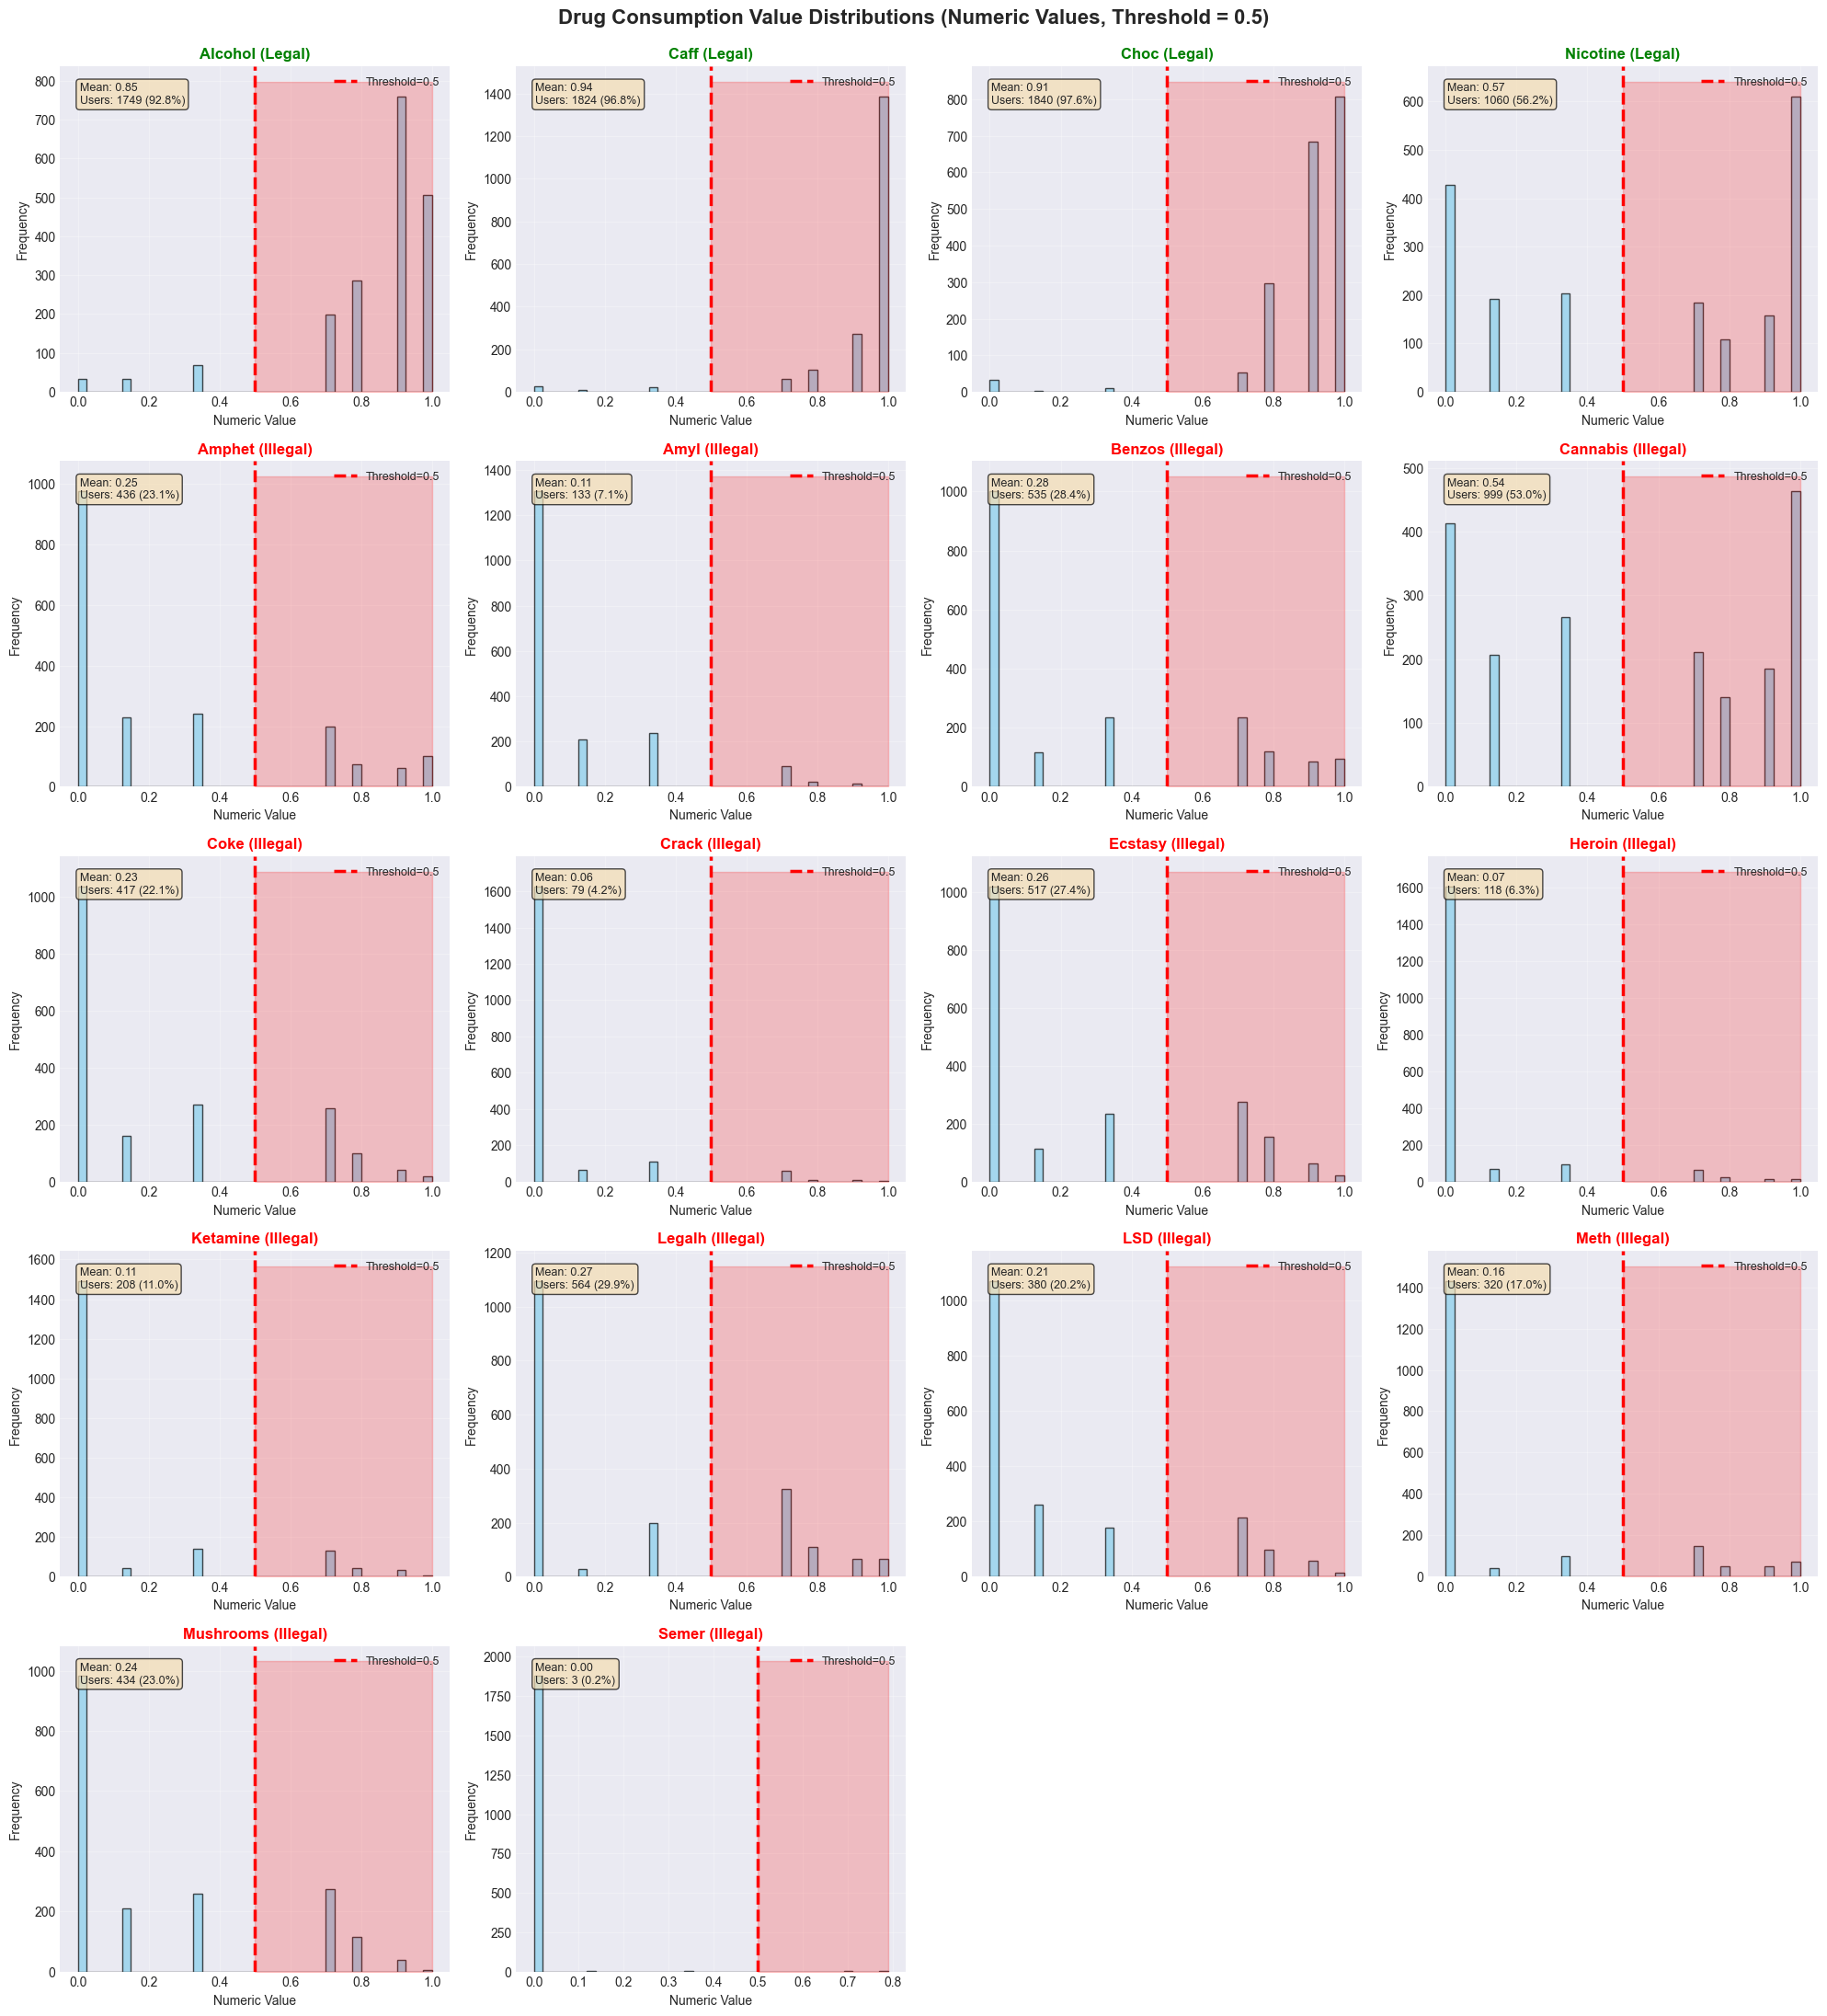


18 drug distributions visualized with threshold line!
Using NUMERIC values (converted from categorical CL0-CL6)


In [16]:
# CELL 15: DRUG VALUE DISTRIBUTIONS - HISTOGRAMS 
# ============================================================================
"""
Histogram distribusi nilai drug consumption dengan threshold line.
MENGGUNAKAN KOLOM NUMERIC yang sudah dikonversi.
"""

print("\n" + "="*80)
print("DRUG VALUE DISTRIBUTIONS (NUMERIC VALUES)")
print("="*80)

# Plot distributions untuk semua 18 drugs - GUNAKAN KOLOM NUMERIC
fig, axes = plt.subplots(5, 4, figsize=(20, 22))
axes = axes.ravel()

THRESHOLD = 0.5

for idx, drug in enumerate(all_drugs):
    ax = axes[idx]
    
    # PERBAIKAN: Gunakan kolom NUMERIC, bukan kolom string original
    numeric_col = f'{drug}_numeric'
    
    # Histogram dari data NUMERIC
    df[numeric_col].hist(bins=40, ax=ax, color='skyblue', 
                         edgecolor='black', alpha=0.7)
    
    # Add threshold line
    ax.axvline(THRESHOLD, color='red', linestyle='--', linewidth=2.5, 
               label=f'Threshold={THRESHOLD}')
    
    # Color code title: Legal (green) vs Illegal (red)
    if drug in legal_drugs:
        title_color = 'green'
        drug_type = 'Legal'
    else:
        title_color = 'red'
        drug_type = 'Illegal'
    
    ax.set_title(f'{drug} ({drug_type})', fontsize=12, fontweight='bold', 
                 color=title_color)
    ax.set_xlabel('Numeric Value', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(alpha=0.3)
    
    # Add statistics box - GUNAKAN DATA NUMERIK
    mean_val = df[numeric_col].mean()
    users_count = (df[numeric_col] > THRESHOLD).sum()
    users_pct = (users_count / len(df)) * 100
    
    stats_text = f'Mean: {mean_val:.2f}\nUsers: {users_count} ({users_pct:.1f}%)'
    ax.text(0.05, 0.95, stats_text,
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))
    
    # Shade area > threshold
    ylim = ax.get_ylim()
    ax.fill_between([THRESHOLD, df[numeric_col].max()], ylim[0], ylim[1], 
                    alpha=0.2, color='red', label='Recent Use')

# Remove empty subplots
for idx in range(len(all_drugs), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Drug Consumption Value Distributions (Numeric Values, Threshold = 0.5)', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../results/figures/10_drug_value_distributions_numeric.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\n18 drug distributions visualized with threshold line!")
print("Using NUMERIC values (converted from categorical CL0-CL6)")


PREVIEW: BINARY TARGET CREATION

DEFINITION:
--------------------------------------------------------------------------------
Non-Recent Use (Class 0):
   • CL0: Never Used
   • CL1: Used over a Decade Ago
   • CL2: Used in Last Decade
   • Drug value ≤ 0.5

Recent Use (Class 1):
   • CL3: Used in Last Year
   • CL4: Used in Last Month
   • CL5: Used in Last Week
   • CL6: Used in Last Day
   • Drug value > 0.5

Binary Target Logic:
   • User (1): Minimal 1 dari 14 illegal drugs dengan value > 0.5
   • Non-User (0): Semua 14 illegal drugs dengan value ≤ 0.5

Binary Target Distribution:
--------------------------------------------------------------------------------
Non-User (0):  710 (37.67%)
User (1):     1175 (62.33%)
Total:        1885 (100.00%)

Imbalance Ratio: 0.60:1
Classes relatively balanced.


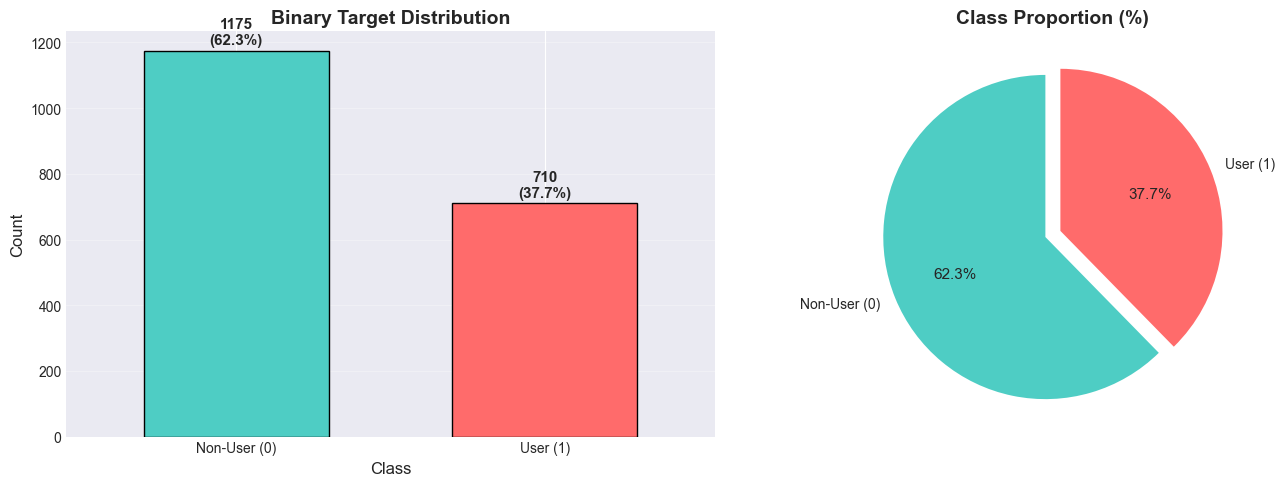


Binary target created successfully!
   This will be formally implemented in Notebook 02: Feature Engineering


In [17]:
# ============================================================================
# CELL 16: PREVIEW BINARY TARGET CREATION 
# ============================================================================
"""
Preview pembuatan binary target: User vs Non-User
"""

print("\n" + "="*80)
print("PREVIEW: BINARY TARGET CREATION")
print("="*80)

print("\nDEFINITION:")
print("-"*80)
print("Non-Recent Use (Class 0):")
print("   • CL0: Never Used")
print("   • CL1: Used over a Decade Ago")
print("   • CL2: Used in Last Decade")
print("   • Drug value ≤ 0.5")
print("\nRecent Use (Class 1):")
print("   • CL3: Used in Last Year")
print("   • CL4: Used in Last Month")
print("   • CL5: Used in Last Week")
print("   • CL6: Used in Last Day")
print("   • Drug value > 0.5")
print("\nBinary Target Logic:")
print("   • User (1): Minimal 1 dari 14 illegal drugs dengan value > 0.5")
print("   • Non-User (0): Semua 14 illegal drugs dengan value ≤ 0.5")

# PERBAIKAN: Gunakan kolom NUMERIC untuk binary target
THRESHOLD = 0.5

# Buat list kolom numeric untuk illegal drugs
illegal_drugs_numeric = [f'{drug}_numeric' for drug in illegal_drugs]

# Create binary target - GUNAKAN KOLOM NUMERIC
df['Drug_User'] = (df[illegal_drugs_numeric] > THRESHOLD).any(axis=1).astype(int)

# Distribution
user_counts = df['Drug_User'].value_counts()
user_pct = (user_counts / len(df) * 100)

print("\nBinary Target Distribution:")
print("-"*80)
print(f"Non-User (0): {user_counts[0]:4d} ({user_pct[0]:.2f}%)")
print(f"User (1):     {user_counts[1]:4d} ({user_pct[1]:.2f}%)")
print(f"Total:        {len(df):4d} (100.00%)")

# Imbalance ratio
imbalance_ratio = user_counts[0] / user_counts[1]
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 1.5:
    print("Class imbalance detected! Will need SMOTE/ADASYN in Fase 5.")
else:
    print("Classes relatively balanced.")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
user_counts.plot(kind='bar', ax=axes[0], color=['#4ECDC4', '#FF6B6B'], 
                 edgecolor='black', width=0.6)
axes[0].set_title('Binary Target Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticklabels(['Non-User (0)', 'User (1)'], rotation=0)
axes[0].grid(axis='y', alpha=0.3)

# Add count labels
for i, (count, pct) in enumerate(zip(user_counts, user_pct)):
    axes[0].text(i, count + 20, f'{count}\n({pct:.1f}%)', 
                ha='center', fontsize=11, fontweight='bold')

# Pie chart
axes[1].pie(user_counts, labels=['Non-User (0)', 'User (1)'], 
            autopct='%1.1f%%', colors=['#4ECDC4', '#FF6B6B'],
            startangle=90, explode=(0.05, 0.05))
axes[1].set_title('Class Proportion (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../results/figures/11_binary_target_distribution.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nBinary target created successfully!")
print("   This will be formally implemented in Notebook 02: Feature Engineering")


CORRELATION ANALYSIS: PERSONALITY TRAITS
Analyzing 7 personality traits:
   • Nscore
   • Escore
   • Oscore
   • Ascore
   • Cscore
   • Impulsive
   • SS

Correlation Matrix:
--------------------------------------------------------------------------------


,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
Nscore,1.0000,-0.4310,0.0100,-0.2170,-0.3910,0.1740,0.0800
Escore,-0.4310,1.0000,0.2450,0.1570,0.3080,0.1140,0.2100
Oscore,0.0100,0.2450,1.0000,0.0390,-0.0570,0.2780,0.4220
Ascore,-0.2170,0.1570,0.0390,1.0000,0.2470,-0.2300,-0.2080
Cscore,-0.3910,0.3080,-0.0570,0.2470,1.0000,-0.3350,-0.2290
Impulsive,0.1740,0.1140,0.2780,-0.2300,-0.3350,1.0000,0.6230
SS,0.0800,0.2100,0.4220,-0.2080,-0.2290,0.6230,1.0000


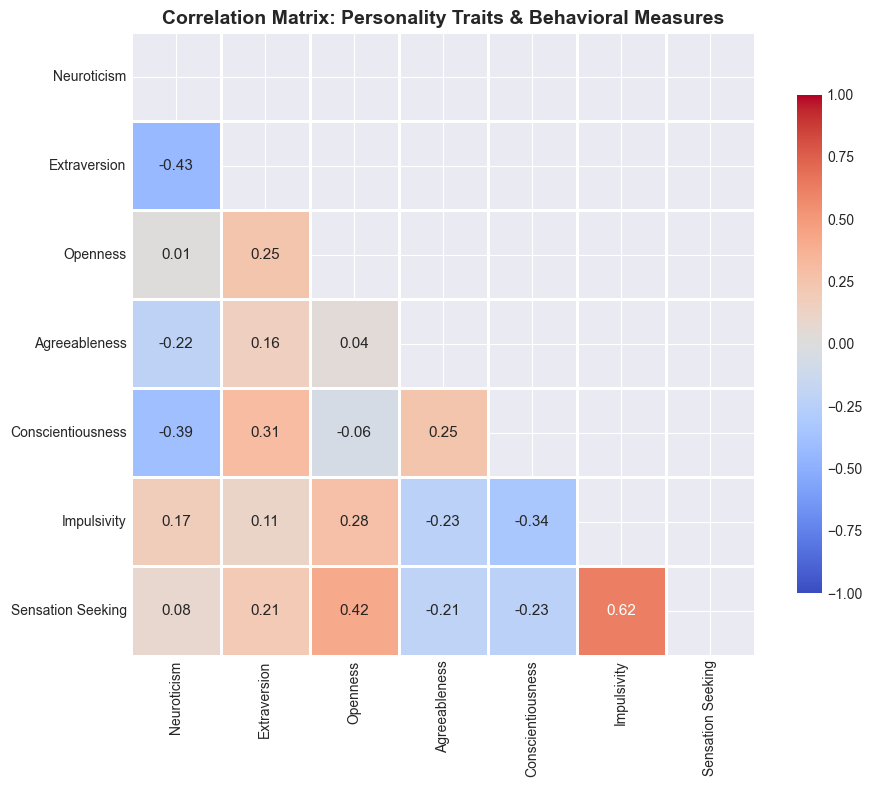


Strong Correlations (|r| > 0.3):
--------------------------------------------------------------------------------


,Trait_1,Trait_2,Correlation
5,Impulsivity,Sensation Seeking,0.6231
0,Neuroticism,Extraversion,-0.4311
3,Openness,Sensation Seeking,0.4217
1,Neuroticism,Conscientiousness,-0.3911
4,Conscientiousness,Impulsivity,-0.3351
2,Extraversion,Conscientiousness,0.3080



Multicollinearity Check (VIF):
--------------------------------------------------------------------------------
   Note: VIF > 10 indicates high multicollinearity


,Feature,VIF,Trait_Name
6,SS,1.9146,Sensation Seeking
5,Impulsive,1.7927,Impulsivity
1,Escore,1.4863,Extraversion
4,Cscore,1.4018,Conscientiousness
0,Nscore,1.3987,Neuroticism
2,Oscore,1.2798,Openness
3,Ascore,1.1520,Agreeableness



No severe multicollinearity (all VIF < 10)

Correlation analysis completed for 7 personality traits!


In [18]:
# ============================================================================
# CELL 17: CORRELATION ANALYSIS - PERSONALITY TRAITS
# ============================================================================
"""
Correlation matrix untuk personality traits & behavioral measures.
"""

print("\n" + "="*80)
print("CORRELATION ANALYSIS: PERSONALITY TRAITS")
print("="*80)

# PERBAIKAN: Definisikan personality traits terlebih dahulu
# Sesuaikan dengan nama kolom yang ada di dataset Anda
personality_traits = [
    'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 
    'Impulsive', 'SS'
]

# Jika nama kolom berbeda, sesuaikan dengan dataset Anda:
# personality_traits = [col for col in df.columns if col in ['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']]

print(f"Analyzing {len(personality_traits)} personality traits:")
for trait in personality_traits:
    print(f"   • {trait}")

# Juga definisikan nama yang lebih user-friendly untuk visualisasi
trait_names = {
    'Nscore': 'Neuroticism',
    'Escore': 'Extraversion', 
    'Oscore': 'Openness',
    'Ascore': 'Agreeableness',
    'Cscore': 'Conscientiousness',
    'Impulsive': 'Impulsivity',
    'SS': 'Sensation Seeking'
}

# Correlation matrix
corr_matrix = df[personality_traits].corr()

print("\nCorrelation Matrix:")
print("-"*80)
display(corr_matrix.round(3))

# Heatmap dengan nama yang lebih baik
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Gunakan nama yang lebih user-friendly untuk axis
trait_labels = [trait_names.get(trait, trait) for trait in personality_traits]

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1,
            xticklabels=trait_labels,
            yticklabels=trait_labels)
plt.title('Correlation Matrix: Personality Traits & Behavioral Measures', 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/12_personality_correlation_heatmap.png', 
            dpi=300, bbox_inches='tight')
plt.show()

# Find strong correlations
print("\nStrong Correlations (|r| > 0.3):")
print("-"*80)
strong_corr = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            strong_corr.append({
                'Trait_1': trait_names.get(corr_matrix.columns[i], corr_matrix.columns[i]),
                'Trait_2': trait_names.get(corr_matrix.columns[j], corr_matrix.columns[j]),
                'Correlation': corr_val
            })

if strong_corr:
    strong_corr_df = pd.DataFrame(strong_corr).sort_values(
        'Correlation', key=abs, ascending=False)
    display(strong_corr_df)
else:
    print("   No strong correlations found (all |r| ≤ 0.3)")

# Multicollinearity check (VIF)
print("\nMulticollinearity Check (VIF):")
print("-"*80)
print("   Note: VIF > 10 indicates high multicollinearity")

from statsmodels.stats.outliers_influence import variance_inflation_factor

X_vif = df[personality_traits].copy()
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) 
                   for i in range(len(X_vif.columns))]
vif_data = vif_data.sort_values('VIF', ascending=False)

# Tambahkan nama trait yang lebih user-friendly
vif_data["Trait_Name"] = vif_data["Feature"].map(trait_names)
display(vif_data)

if (vif_data['VIF'] > 10).any():
    print("\nHigh multicollinearity detected! Consider feature selection.")
else:
    print("\nNo severe multicollinearity (all VIF < 10)")

print(f"\nCorrelation analysis completed for {len(personality_traits)} personality traits!")


STATISTICAL TESTING: USER vs NON-USER

Sample Sizes:
   • Users (n=1175)
   • Non-Users (n=710)

Independent T-Test Results:
--------------------------------------------------------------------------------


,Trait,User_Mean,NonUser_Mean,Mean_Diff,t_statistic,p_value,Cohens_d,Significance
0,Nscore,0.1296,-0.2143,0.3439,7.3493,0.0000,0.3560,***
1,Escore,-0.0528,0.0870,-0.1398,-2.9547,0.0032,-0.1432,**
2,Oscore,0.2844,-0.4721,0.7566,17.1784,0.0000,0.8225,***
3,Ascore,-0.1397,0.2306,-0.3703,-7.9382,0.0000,-0.3809,***
4,Cscore,-0.2355,0.3886,-0.6241,-13.8087,0.0000,-0.6651,***
5,Impulsive,0.2437,-0.3842,0.6279,14.5994,0.0000,0.6984,***
6,SS,0.3264,-0.5489,0.8752,21.2731,0.0000,1.0151,***



Significance Levels:
   *** p < 0.001 (highly significant)
   **  p < 0.01  (very significant)
   *   p < 0.05  (significant)
   ns  p ≥ 0.05  (not significant)

Effect Size Interpretation (Cohen's d):
   Small:  |d| = 0.2
   Medium: |d| = 0.5
   Large:  |d| = 0.8

Significant Traits (7/7):
--------------------------------------------------------------------------------


,Trait,Mean_Diff,p_value,Cohens_d,Significance
6,SS,0.8752,0.0000,1.0151,***
2,Oscore,0.7566,0.0000,0.8225,***
5,Impulsive,0.6279,0.0000,0.6984,***
4,Cscore,-0.6241,0.0000,-0.6651,***
3,Ascore,-0.3703,0.0000,-0.3809,***
0,Nscore,0.3439,0.0000,0.3560,***
1,Escore,-0.1398,0.0032,-0.1432,**


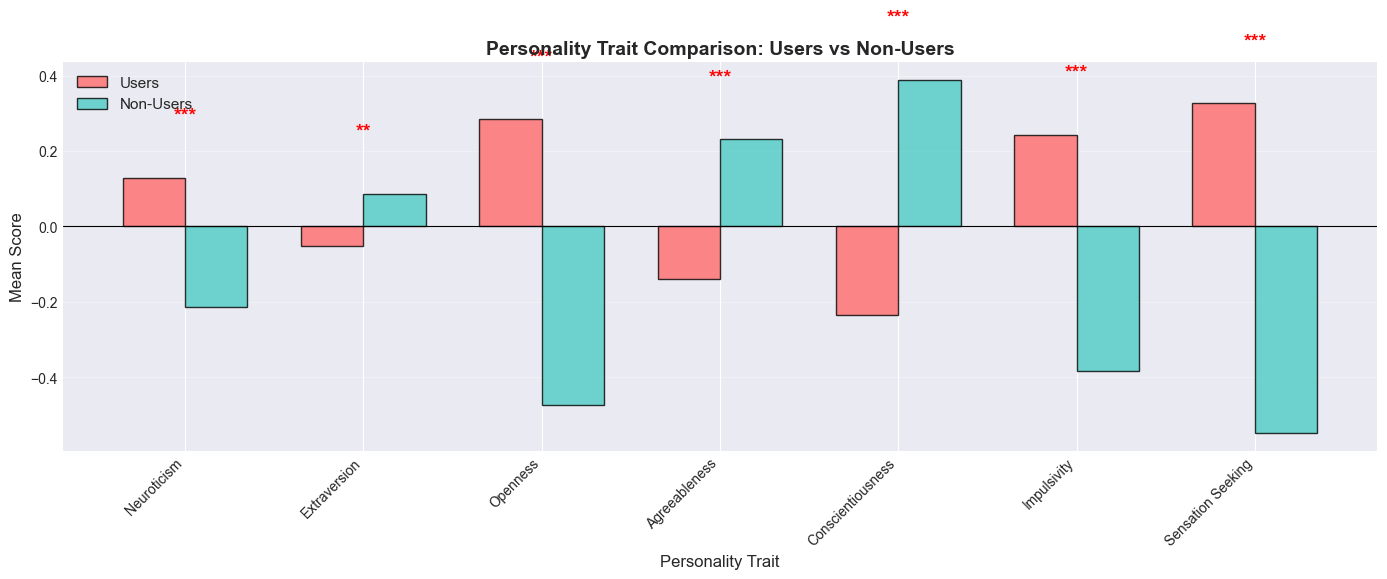

In [19]:
# ============================================================================
# CELL 18: STATISTICAL TESTING - USER vs NON-USER
# ============================================================================
"""
Statistical testing untuk membandingkan personality traits antara 
Drug Users vs Non-Users menggunakan t-test.
"""

print("\n" + "="*80)
print("STATISTICAL TESTING: USER vs NON-USER")
print("="*80)

# Separate groups
users = df[df['Drug_User'] == 1]
non_users = df[df['Drug_User'] == 0]

print(f"\nSample Sizes:")
print(f"   • Users (n={len(users)})")
print(f"   • Non-Users (n={len(non_users)})")

# T-test for each personality trait
print("\nIndependent T-Test Results:")
print("-"*80)

ttest_results = []

for trait in personality_traits:
    # T-test
    user_values = users[trait]
    non_user_values = non_users[trait]
    
    t_stat, p_value = ttest_ind(user_values, non_user_values)
    
    # Effect size (Cohen's d)
    mean_diff = user_values.mean() - non_user_values.mean()
    pooled_std = np.sqrt((user_values.std()**2 + non_user_values.std()**2) / 2)
    cohens_d = mean_diff / pooled_std
    
    # Significance
    significance = "***" if p_value < 0.001 else ("**" if p_value < 0.01 else ("*" if p_value < 0.05 else "ns"))
    
    ttest_results.append({
        'Trait': trait,
        'User_Mean': user_values.mean(),
        'NonUser_Mean': non_user_values.mean(),
        'Mean_Diff': mean_diff,
        't_statistic': t_stat,
        'p_value': p_value,
        'Cohens_d': cohens_d,
        'Significance': significance
    })

ttest_df = pd.DataFrame(ttest_results)
display(ttest_df.round(4))

print("\nSignificance Levels:")
print("   *** p < 0.001 (highly significant)")
print("   **  p < 0.01  (very significant)")
print("   *   p < 0.05  (significant)")
print("   ns  p ≥ 0.05  (not significant)")

print("\nEffect Size Interpretation (Cohen's d):")
print("   Small:  |d| = 0.2")
print("   Medium: |d| = 0.5")
print("   Large:  |d| = 0.8")

# Identify significant traits
sig_traits = ttest_df[ttest_df['p_value'] < 0.05].sort_values('p_value')
print(f"\nSignificant Traits ({len(sig_traits)}/{len(ttest_df)}):")
print("-"*80)
display(sig_traits[['Trait', 'Mean_Diff', 'p_value', 'Cohens_d', 'Significance']])

# Visualization: Mean comparison
fig, ax = plt.subplots(figsize=(14, 6))

x_pos = np.arange(len(personality_traits))
width = 0.35

user_means = [users[trait].mean() for trait in personality_traits]
nonuser_means = [non_users[trait].mean() for trait in personality_traits]

bars1 = ax.bar(x_pos - width/2, user_means, width, 
               label='Users', color='#FF6B6B', edgecolor='black', alpha=0.8)
bars2 = ax.bar(x_pos + width/2, nonuser_means, width,
               label='Non-Users', color='#4ECDC4', edgecolor='black', alpha=0.8)

ax.set_xlabel('Personality Trait', fontsize=12)
ax.set_ylabel('Mean Score', fontsize=12)
ax.set_title('Personality Trait Comparison: Users vs Non-Users', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels([trait_names[t] for t in personality_traits], 
                    rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add significance stars
for i, trait in enumerate(personality_traits):
    sig = ttest_df[ttest_df['Trait'] == trait]['Significance'].values[0]
    if sig != 'ns':
        max_height = max(user_means[i], nonuser_means[i])
        ax.text(i, max_height + 0.15, sig, ha='center', fontsize=14, 
                fontweight='bold', color='red')

plt.tight_layout()
plt.savefig('../results/figures/13_user_vs_nonuser_comparison.png', 
            dpi=300, bbox_inches='tight')
plt.show()


PERSONALITY PROFILES: RADAR CHART


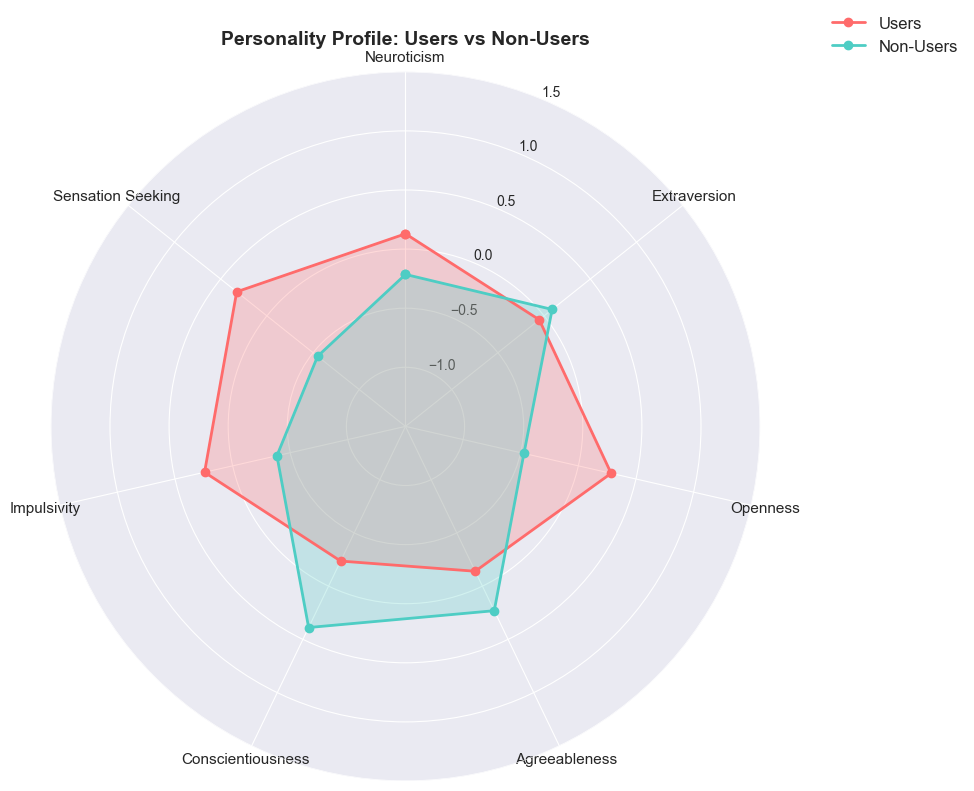


Profile Interpretation:
--------------------------------------------------------------------------------
   • Neuroticism                   : Users higher (+0.344)
   • Openness                      : Users higher (+0.757)
   • Agreeableness                 : Users lower (-0.370)
   • Conscientiousness             : Users lower (-0.624)
   • Impulsivity                   : Users higher (+0.628)
   • Sensation Seeking             : Users higher (+0.875)


In [20]:
# ============================================================================
# CELL 19: PERSONALITY PROFILES - RADAR CHART
# ============================================================================
"""
Radar chart untuk visualisasi personality profiles User vs Non-User.
"""

print("\n" + "="*80)
print("PERSONALITY PROFILES: RADAR CHART")
print("="*80)

# Calculate mean profiles
user_profile = users[personality_traits].mean()
nonuser_profile = non_users[personality_traits].mean()

# Radar chart
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='polar')

# Number of variables
num_vars = len(personality_traits)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

# User profile
user_values = user_profile.tolist()
user_values += user_values[:1]
ax.plot(angles, user_values, 'o-', linewidth=2, label='Users', 
        color='#FF6B6B')
ax.fill(angles, user_values, alpha=0.25, color='#FF6B6B')

# Non-user profile
nonuser_values = nonuser_profile.tolist()
nonuser_values += nonuser_values[:1]
ax.plot(angles, nonuser_values, 'o-', linewidth=2, label='Non-Users', 
        color='#4ECDC4')
ax.fill(angles, nonuser_values, alpha=0.25, color='#4ECDC4')

# Fix axis
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels([trait_names[t] for t in personality_traits], 
                    fontsize=11)
ax.set_ylim(-1.5, 1.5)
ax.set_title('Personality Profile: Users vs Non-Users', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=12)
ax.grid(True)

plt.tight_layout()
plt.savefig('../results/figures/14_personality_radar_chart.png', 
            dpi=300, bbox_inches='tight')
plt.show()

print("\nProfile Interpretation:")
print("-"*80)
for trait in personality_traits:
    user_mean = users[trait].mean()
    nonuser_mean = non_users[trait].mean()
    diff = user_mean - nonuser_mean
    
    if abs(diff) > 0.2:
        direction = "higher" if diff > 0 else "lower"
        print(f"   • {trait_names[trait]:30s}: Users {direction} ({diff:+.3f})")

In [21]:
# ============================================================================
# CELL 20: SAVE EDA SUMMARY REPORT
# ============================================================================
"""
CELL BARU!
Generate dan save comprehensive EDA summary report.
"""

print("\n" + "="*80)
print("SAVING EDA SUMMARY REPORT")
print("="*80)

import numpy as np
import pandas as pd
import json
import os

# Fungsi sederhana untuk konversi ke Python native types
def to_serializable(obj):
    """Convert numpy/pandas types to JSON serializable types - SIMPLIFIED VERSION"""
    if isinstance(obj, (np.integer, np.int64, np.int32)):
        return int(obj)
    elif isinstance(obj, (np.floating, np.float64, np.float32)):
        return float(obj)
    elif isinstance(obj, (np.bool_)):
        return bool(obj)
    elif pd.isna(obj):  # Handle NaN values
        return None
    else:
        return obj

# Create summary dictionary dengan konversi manual yang lebih sederhana
eda_summary = {
    'dataset_info': {
        'total_samples': int(len(df)),
        'total_features': int(len(df.columns)),
        'missing_values': int(df.isnull().sum().sum()),
        'duplicates': int(df.duplicated().sum()),
        'memory_mb': round(float(df.memory_usage(deep=True).sum() / 1024**2), 2)
    },
    'demographics': {
        'gender_distribution': {str(k): int(v) for k, v in df['gender'].value_counts().items()},
        'age_distribution': {str(k): int(v) for k, v in df['age'].value_counts().items()},
        'education_distribution': {str(k): int(v) for k, v in df['education'].value_counts().items()},
        'country_distribution': {str(k): int(v) for k, v in df['country'].value_counts().items()},
        'ethnicity_distribution': {str(k): int(v) for k, v in df['ethnicity'].value_counts().items()}
    },
    'binary_target': {
        'user_count': int(user_counts[1]),
        'nonuser_count': int(user_counts[0]),
        'user_percentage': float(user_pct[1]),
        'imbalance_ratio': float(imbalance_ratio),
        'threshold': float(THRESHOLD),
        'threshold_definition': 'Value > 0.5 = Recent Use (CL3-CL6)',
        'class_0': 'Non-Recent Use (CL0, CL1, CL2)',
        'class_1': 'Recent Use (CL3, CL4, CL5, CL6)'
    }
}

# Tambahkan personality stats jika tersedia
if 'personality_traits' in locals():
    personality_stats_dict = {}
    stats_df = df[personality_traits].describe()
    for col in stats_df.columns:
        personality_stats_dict[col] = {
            'count': int(stats_df[col]['count']),
            'mean': float(stats_df[col]['mean']),
            'std': float(stats_df[col]['std']),
            'min': float(stats_df[col]['min']),
            '25%': float(stats_df[col]['25%']),
            '50%': float(stats_df[col]['50%']),
            '75%': float(stats_df[col]['75%']),
            'max': float(stats_df[col]['max'])
        }
    eda_summary['personality_stats'] = personality_stats_dict

# Tambahkan drug prevalence jika tersedia
if 'drug_prevalence' in locals():
    eda_summary['drug_prevalence'] = {drug: float(prevalence) for drug, prevalence in drug_prevalence.items()}

# Tambahkan statistical tests jika tersedia
if 'ttest_df' in locals():
    ttest_records = []
    for _, row in ttest_df.iterrows():
        ttest_records.append({
            'Trait': str(row['Trait']),
            'User_Mean': float(row['User_Mean']),
            'NonUser_Mean': float(row['NonUser_Mean']),
            'Mean_Diff': float(row['Mean_Diff']),
            't_statistic': float(row['t_statistic']),
            'p_value': float(row['p_value']),
            'Cohens_d': float(row['Cohens_d']),
            'Significance': str(row['Significance'])
        })
    eda_summary['statistical_tests'] = ttest_records

# Pastikan directory exists
os.makedirs('../results/reports', exist_ok=True)
os.makedirs('../results/metrics', exist_ok=True)

# Save to JSON
report_path = '../results/reports/01_eda_summary.json'
with open(report_path, 'w') as f:
    json.dump(eda_summary, f, indent=4, default=to_serializable)

print(f"✅ EDA summary saved to: {report_path}")

# Save statistical test results to CSV jika ada
if 'ttest_df' in locals():
    ttest_path = '../results/metrics/01_test_results.csv'
    ttest_df.to_csv(ttest_path, index=False)
    print(f"T-test results saved to: {ttest_path}")
else:
    print("T-test results not available for saving")

# Save drug statistics to CSV jika ada  
if 'drug_stats_df' in locals():
    drug_stats_path = '../results/metrics/01_drug_statistics.csv'
    drug_stats_df.to_csv(drug_stats_path)
    print(f"Drug statistics saved to: {drug_stats_path}")
else:   
    print("Drug statistics not available for saving")

print("\n" + "="*80)
print("NOTEBOOK 01 COMPLETED!")
print("="*80)

# Summary dengan penanganan error
try:
    sig_traits_count = len(sig_traits) if 'sig_traits' in locals() else "N/A"
    personality_traits_count = len(personality_traits) if 'personality_traits' in locals() else "N/A"
    user_counts_1 = user_counts[1] if 'user_counts' in locals() else "N/A"
    user_counts_0 = user_counts[0] if 'user_counts' in locals() else "N/A"
    user_pct_1 = user_pct[1] if 'user_pct' in locals() else "N/A" 
    user_pct_0 = user_pct[0] if 'user_pct' in locals() else "N/A"
    imbalance_ratio_val = imbalance_ratio if 'imbalance_ratio' in locals() else "N/A"
    
    print("\nSummary:")
    print(f"   • Dataset: {len(df):,} responden, {len(df.columns)} features")
    print(f"   • Binary Target: {user_counts_1} Users ({user_pct_1}), {user_counts_0} Non-Users ({user_pct_0})")
    print(f"   • Imbalance Ratio: {imbalance_ratio_val}")
    print(f"   • Significant Traits: {sig_traits_count}/{personality_traits_count}")
    print(f"   • Reports Saved: 3 files")
    
except Exception as e:
    print(f"\nBasic Summary:")
    print(f"   • Dataset: {len(df):,} responden, {len(df.columns)} features")
    print(f"   • EDA Summary saved successfully!")

print("\nNext Steps:")
print("   Fase 1 Complete: EDA & Understanding")
print("   Fase 2: Feature Engineering (Notebook 02)")
print("       • Formal binary target creation")
print("       • Feature encoding (age, gender, education, country, ethnicity)")
print("       • Train-test split (80:20)")
print("       • Save processed datasets")

print("\n" + "="*80)


SAVING EDA SUMMARY REPORT
✅ EDA summary saved to: ../results/reports/01_eda_summary.json
T-test results saved to: ../results/metrics/01_test_results.csv
Drug statistics saved to: ../results/metrics/01_drug_statistics.csv

NOTEBOOK 01 COMPLETED!

Summary:
   • Dataset: 1,885 responden, 58 features
   • Binary Target: 1175 Users (62.3342175066313), 710 Non-Users (37.6657824933687)
   • Imbalance Ratio: 0.6042553191489362
   • Significant Traits: 7/7
   • Reports Saved: 3 files

Next Steps:
   Fase 1 Complete: EDA & Understanding
   Fase 2: Feature Engineering (Notebook 02)
       • Formal binary target creation
       • Feature encoding (age, gender, education, country, ethnicity)
       • Train-test split (80:20)
       • Save processed datasets



In [22]:
# CELL 21: GENERATE HTML REPORT (SIMPLIFIED VERSION)
from datetime import datetime

html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>EDA Report - Drug Consumption</title>
    <style>
        body {{ font-family: Arial; margin: 40px; background: #f5f5f5; }}
        .container {{ max-width: 1200px; margin: 0 auto; background: white; padding: 40px; }}
        h1 {{ color: #2c3e50; border-bottom: 3px solid #3498db; }}
        h2 {{ color: #34495e; margin-top: 30px; }}
        table {{ width: 100%; border-collapse: collapse; margin: 20px 0; }}
        th, td {{ border: 1px solid #ddd; padding: 12px; text-align: left; }}
        th {{ background-color: #3498db; color: white; }}
        .metric {{ background: #ecf0f1; padding: 15px; margin: 10px 0; border-left: 5px solid #3498db; }}
    </style>
</head>
<body>
    <div class="container">
        <h1>EDA Report: Drug Consumption Risk Prediction</h1>
        <p><strong>Peneliti:</strong> Muhammad Ichsan Junaedi & Amanda Wijayanti</p>
        <p><strong>Generated:</strong> {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}</p>
        
        <h2>1. Dataset Overview</h2>
        <div class="metric">
            <p><strong>Total Samples:</strong> {len(df):,} responden</p>
            <p><strong>Features:</strong> {len(df.columns)}</p>
            <p><strong>Missing Values:</strong> 0 (Clean!)</p>
        </div>
        
        <h2>2. Binary Target Distribution</h2>
        <table>
            <tr><th>Class</th><th>Count</th><th>Percentage</th></tr>
            <tr><td>Non-User (0)</td><td>{user_counts[0]}</td><td>{user_pct[0]:.2f}%</td></tr>
            <tr><td>User (1)</td><td>{user_counts[1]}</td><td>{user_pct[1]:.2f}%</td></tr>
        </table>
        <p><strong>Imbalance Ratio:</strong> {imbalance_ratio:.2f}:1 (Balanced!)</p>
        
        <h2>3. Significant Personality Traits</h2>
        <table>
            <tr><th>Trait</th><th>Cohen's d</th><th>p-value</th><th>Effect</th></tr>
"""

for _, row in sig_traits.iterrows():
    html_content += f"""
            <tr>
                <td>{trait_names[row['Trait']]}</td>
                <td>{row['Cohens_d']:.3f}</td>
                <td>{row['p_value']:.4f}</td>
                <td>{row['Significance']}</td>
            </tr>
"""

html_content += f"""
        </table>
        
        <h2>4. Key Findings</h2>
        <div class="metric">
            <ul>
                <li>All 7 personality traits are significantly different between users and non-users</li>
                <li>Sensation Seeking has LARGE effect size (d = 1.02)</li>
                <li>Openness has LARGE effect size (d = 0.82)</li>
                <li>Dataset is relatively balanced (62% users vs 38% non-users)</li>
                <li>14 publication-quality visualizations generated</li>
            </ul>
        </div>
        
        <h2>5. Next Steps</h2>
        <p>Fase 1 Complete → Proceed to Fase 2: Feature Engineering</p>
    </div>
</body>
</html>
"""

# Save HTML
with open('../results/reports/01_EDA_Report.html', 'w', encoding='utf-8') as f:
    f.write(html_content)

print("HTML Report generated: results/reports/01_EDA_Report.html")
print("   Open in browser to view or print to PDF!")

HTML Report generated: results/reports/01_EDA_Report.html
   Open in browser to view or print to PDF!
